In [47]:
from plotfunc_plain import *

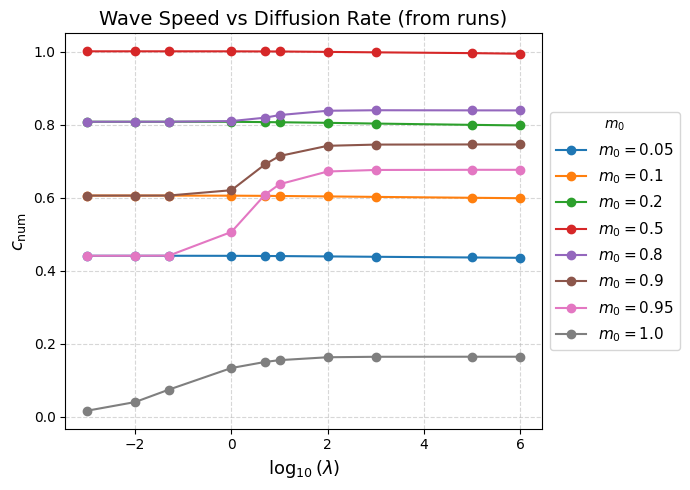

In [48]:
# Speed vs log10(lambda) for many m0
plot_speed_vs_log_lambda_from_runs(
    base_dir="speeds_plain_L200N20001",
    m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
    lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
)

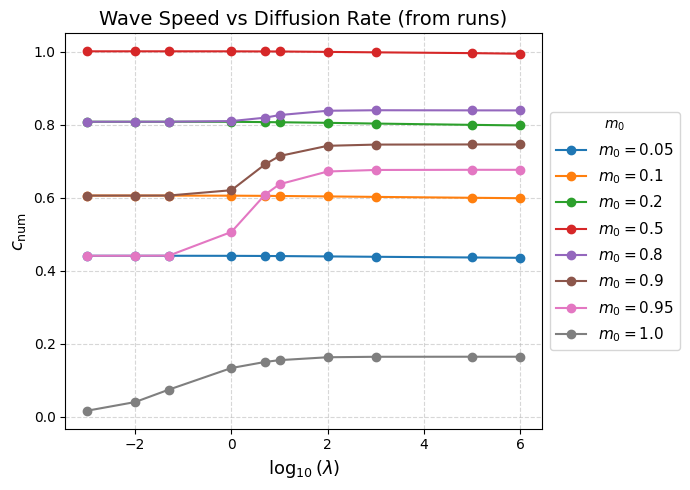

In [2]:
# Speed vs log10(lambda) for many m0
plot_speed_vs_log_lambda_from_runs(
    base_dir="speeds_plain_L200N20001",
    m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
    lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
)

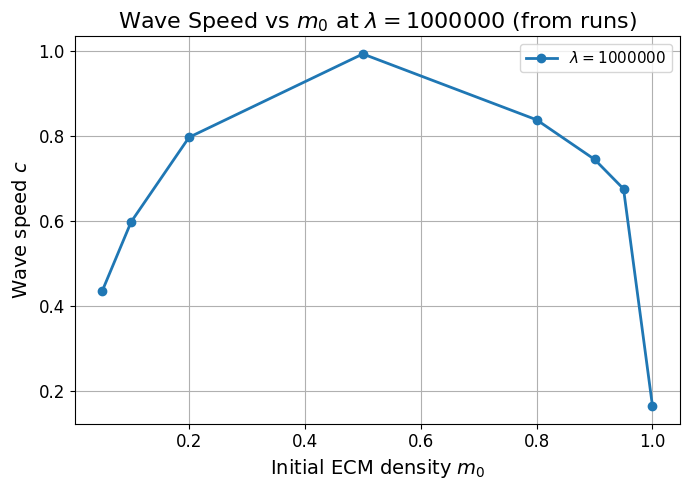

In [3]:
# Speed vs m0 at a fixed lambda
plot_speed_vs_m0_fixed_lambda_from_runs(
    base_dir="speeds_plain_L200N20001",
    lambda_fixed=10**6,
    m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0])

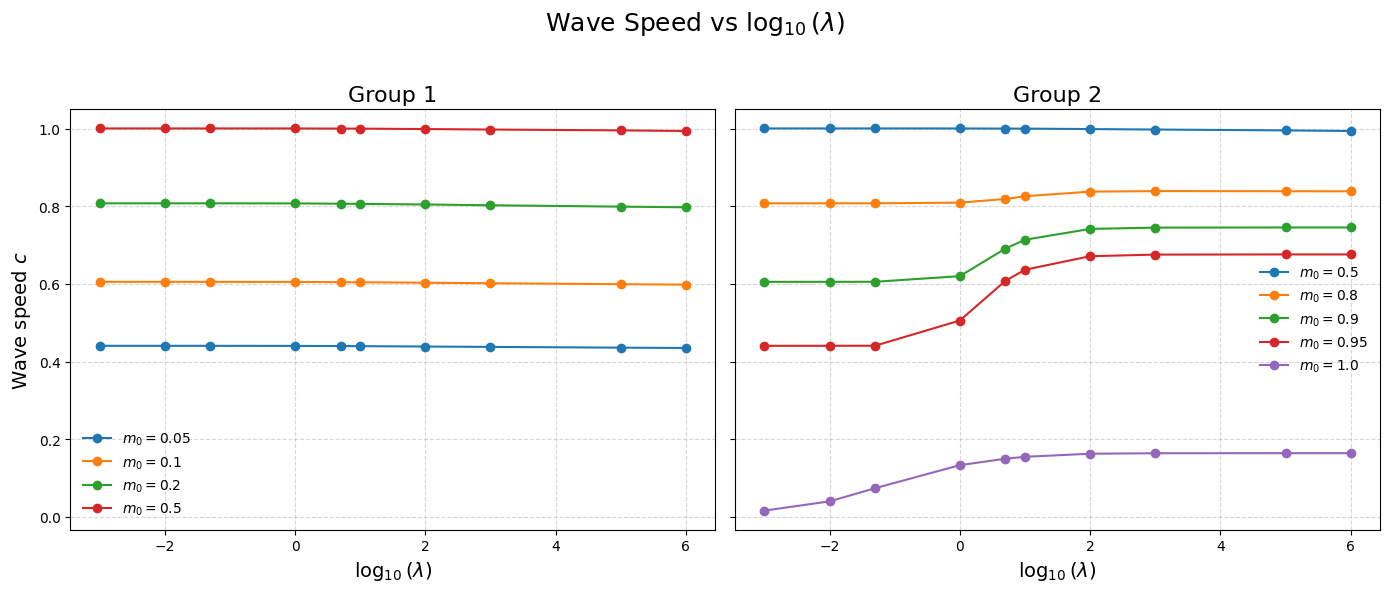

In [4]:
# Right panel set (larger m0)
plot_speed_vs_log_lambda_two_panels_from_runs(
    base_dir="speeds_plain_L200N20001",
    m0_list_left=[0.05, 0.1, 0.2, 0.5],                
    m0_list_right=[0.5, 0.8, 0.9, 0.95, 1.0],          
    lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
)

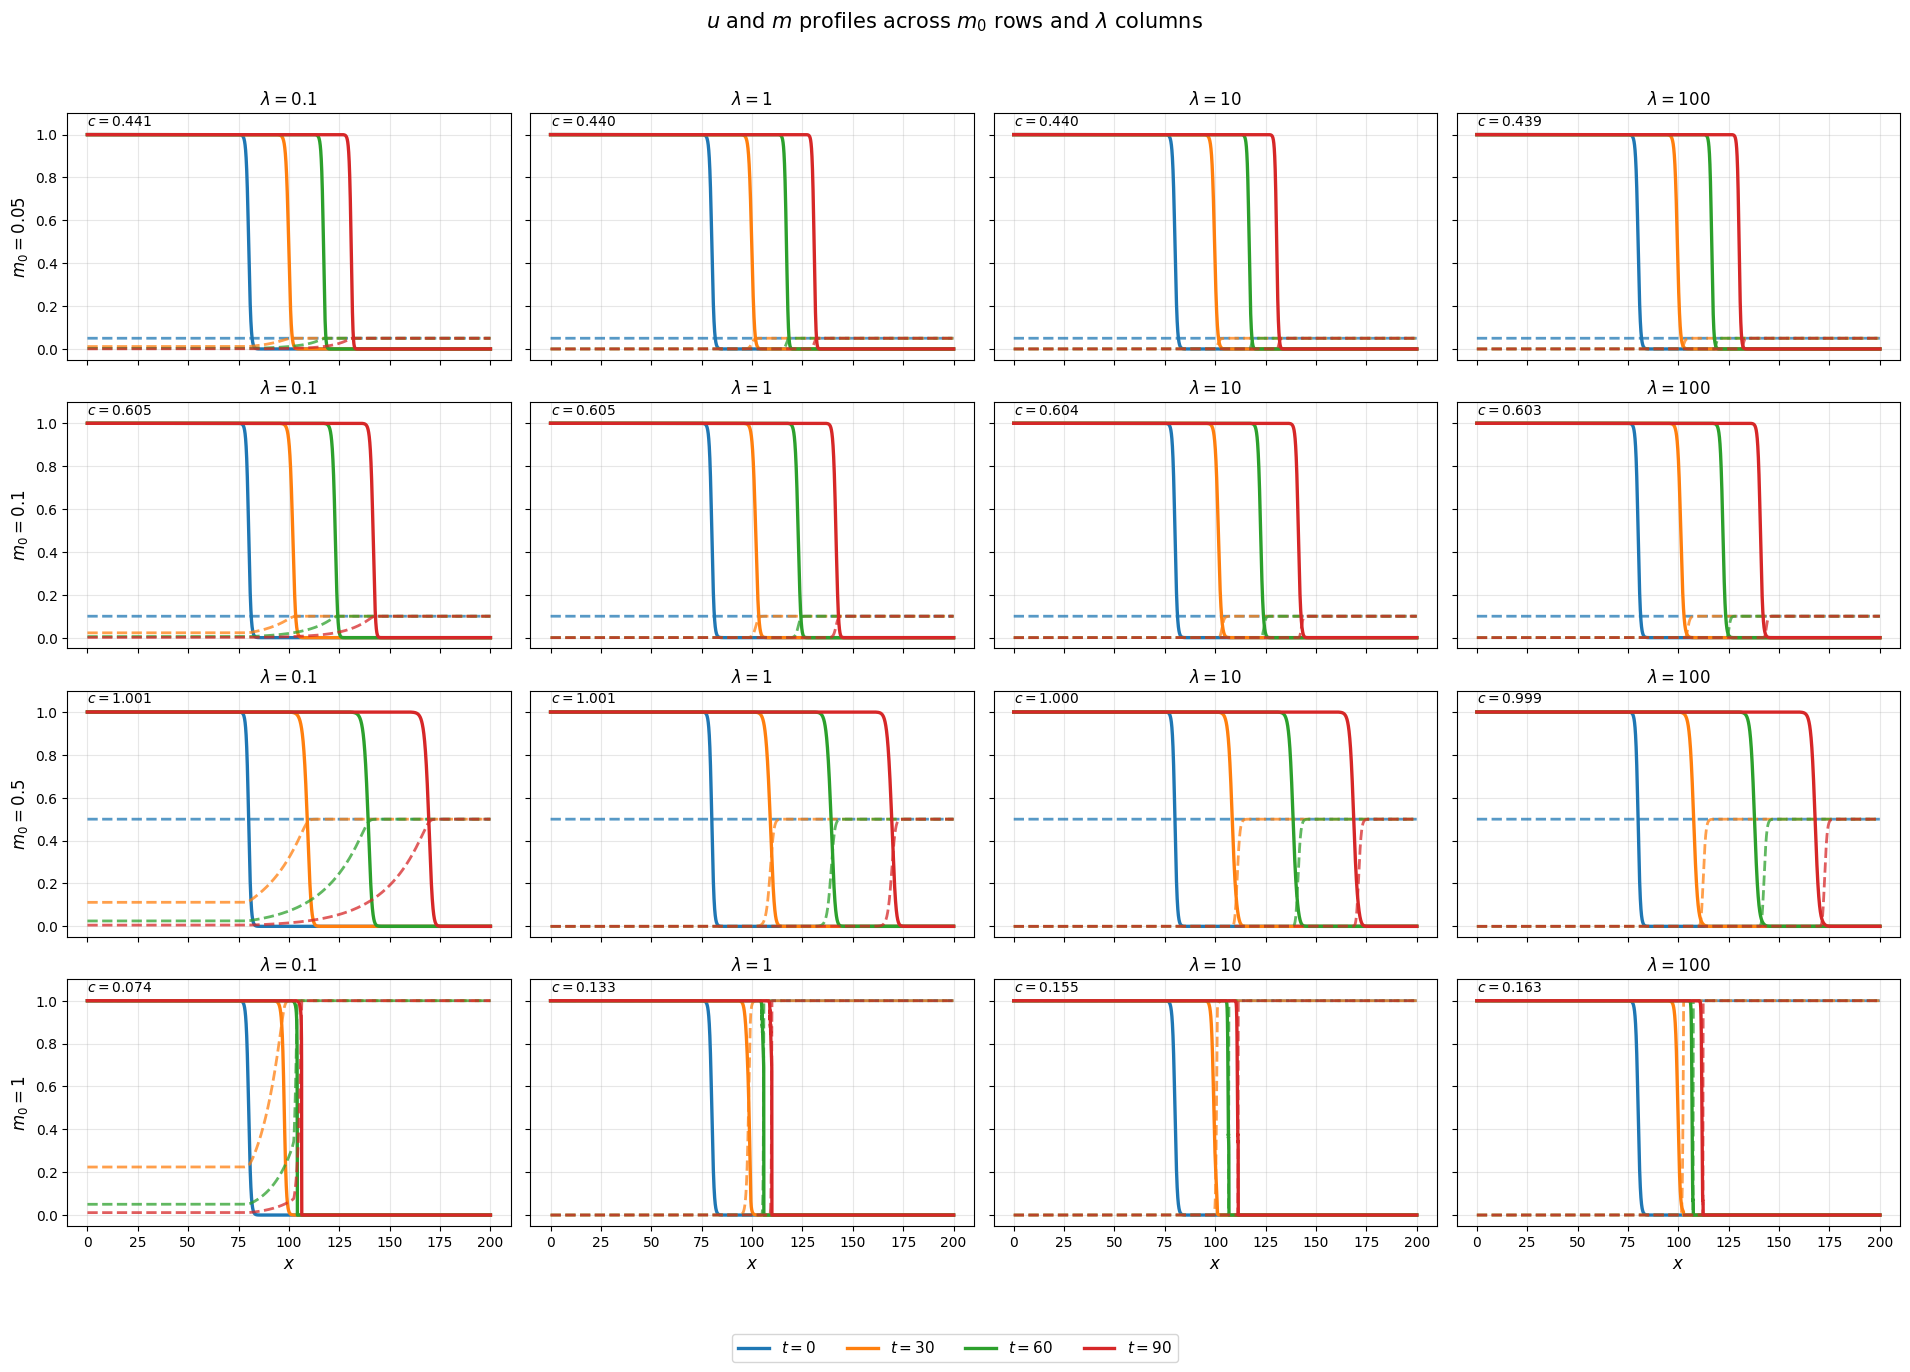

In [5]:
plot_u_m_style_grid_from_nested(
    base_dir="speeds_plain_L200N20001",
    m0_rows=(0.05, 0.1, 0.5, 1),        
    lambda_cols=(0.1, 1, 10, 100),  
    times = (0, 30, 60, 90),    
    xlim=None,                      
    ylim=(-0.05, 1.1),
    suptitle=r"$u$ and $m$ profiles across $m_0$ rows and $\lambda$ columns"
)

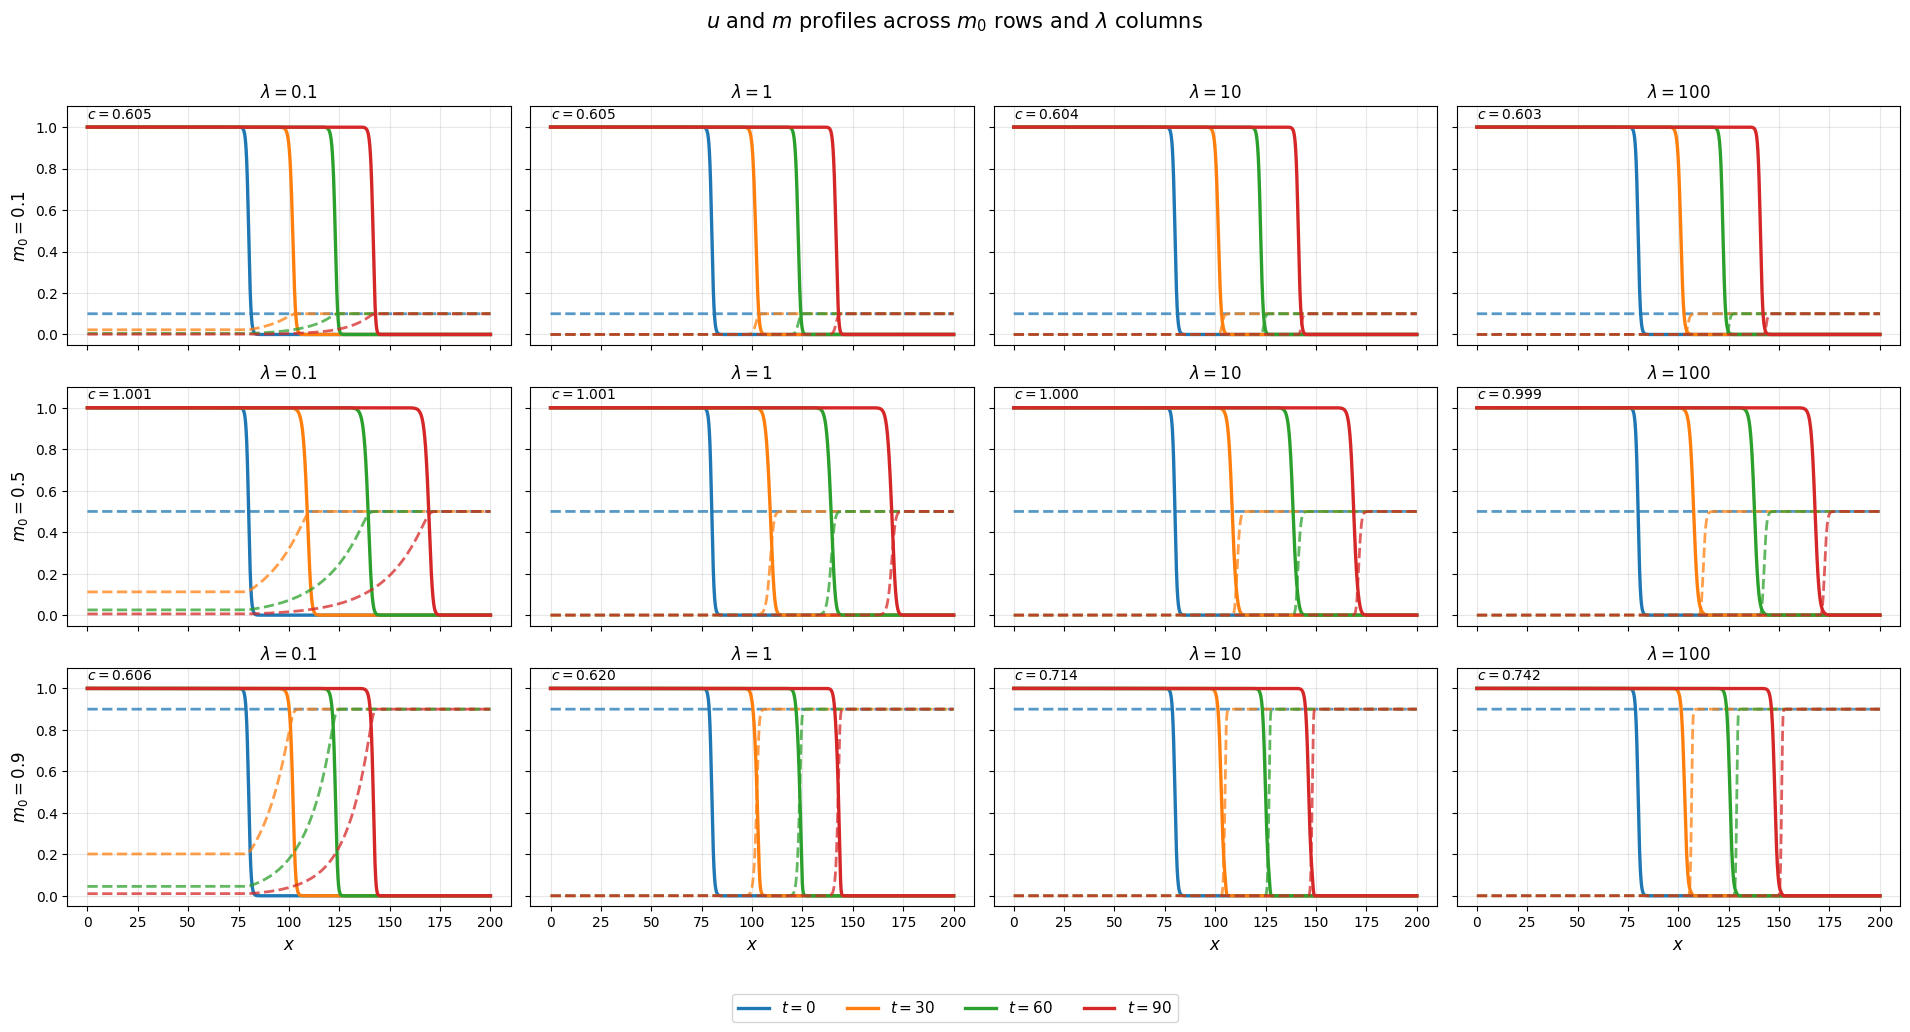

In [6]:
plot_u_m_style_grid_from_nested(
    base_dir="speeds_plain_L200N20001",
    m0_rows=(0.1, 0.5, .9),        
    lambda_cols=(0.1, 1, 10, 100),  
    times = (0, 30, 60, 90),    
    xlim=None,                      
    ylim=(-0.05, 1.1),
    suptitle=r"$u$ and $m$ profiles across $m_0$ rows and $\lambda$ columns"
)

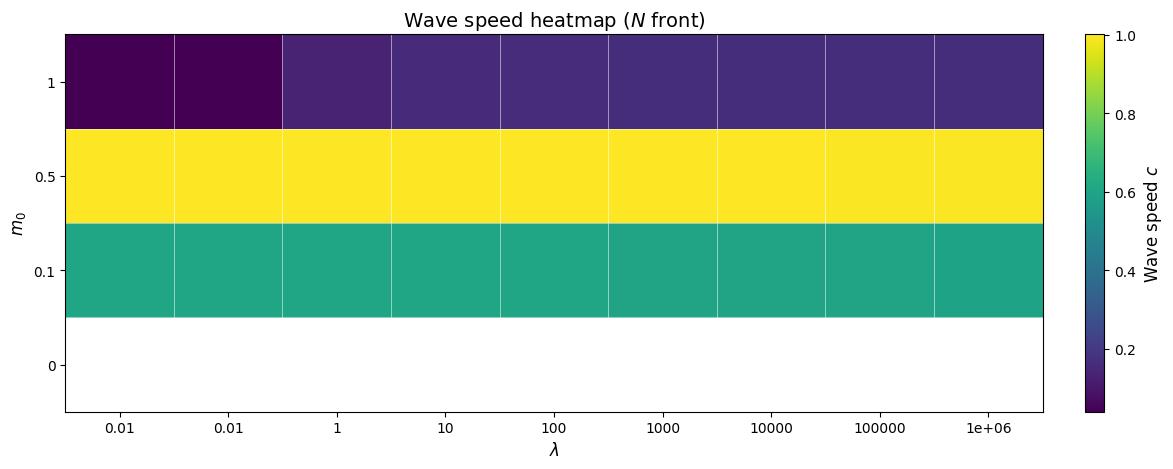

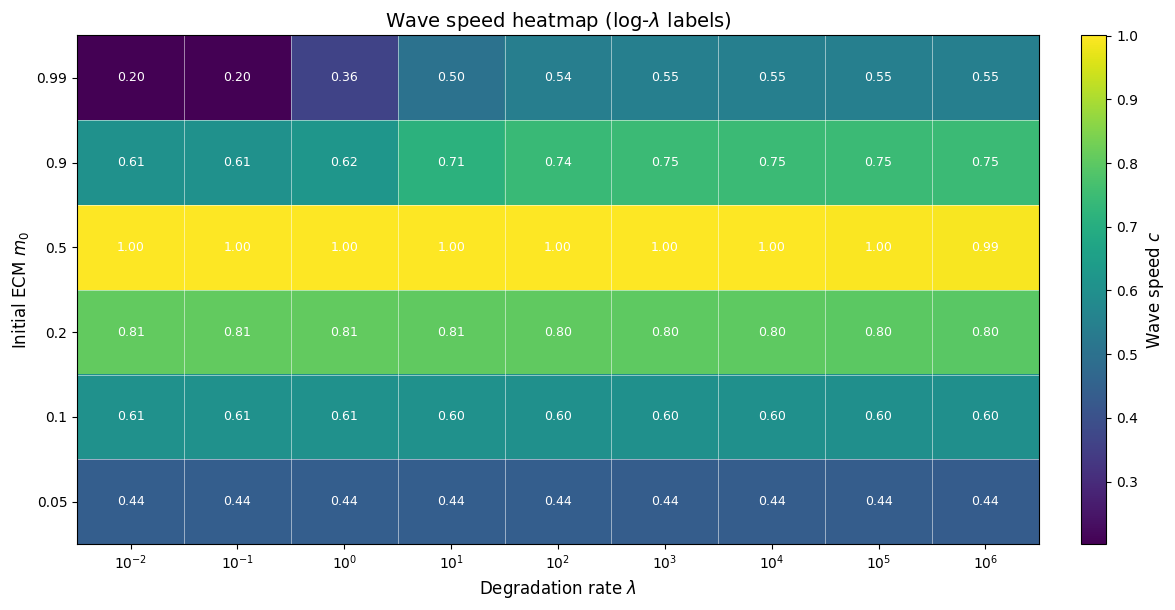

In [5]:
# Tumour-front (N) speeds, basic labels
H = plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.01, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.0, 0.1, 0.5, 1.0),
    title=r"Wave speed heatmap ($N$ front)",
    which_speed="N",
    annotate=False
)

# Same but with scientific (log) labels on the lambda axis and annotations
H2 = plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    n_label=r"Initial ECM $m_0$",
    x_label=r"Degradation rate $\lambda$",
    title=r"Wave speed heatmap (log-$\lambda$ labels)",
    which_speed="N",
    log_lambda_ticks=True,
    annotate=True
)

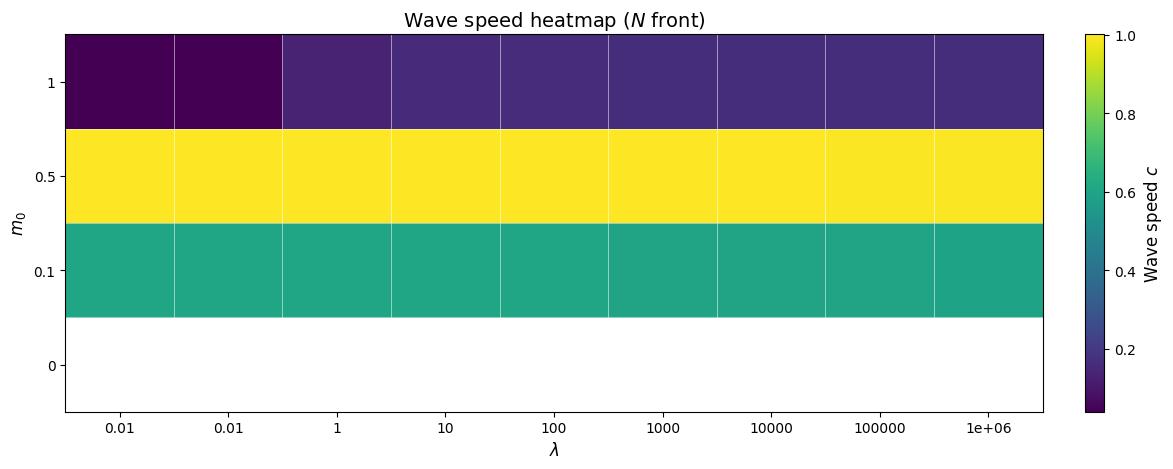

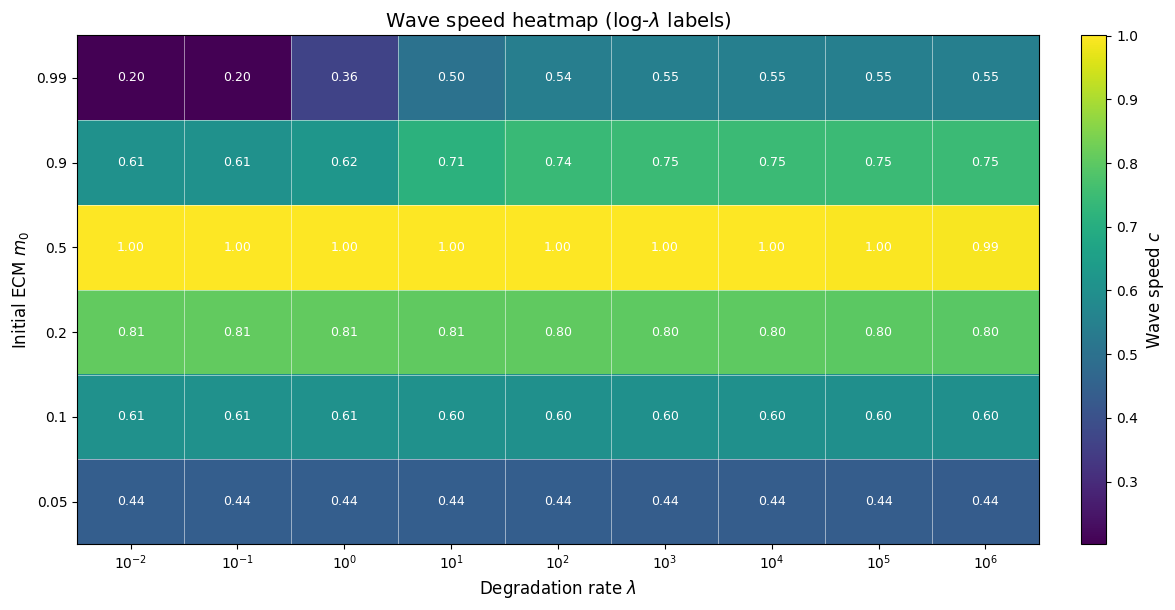

In [15]:
# Tumour-front (N) speeds, basic labels
H = plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.01, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.0, 0.1, 0.5, 1.0),
    title=r"Wave speed heatmap ($N$ front)",
    which_speed="N",
    annotate=False
)

# Same but with scientific (log) labels on the lambda axis and annotations
H2 = plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    n_label=r"Initial ECM $m_0$",
    x_label=r"Degradation rate $\lambda$",
    title=r"Wave speed heatmap (log-$\lambda$ labels)",
    which_speed="N",
    log_lambda_ticks=True,
    annotate=True
)

In [7]:
import os, re, json
import numpy as np
import matplotlib.pyplot as plt

# -------------------- loaders (match your saving layout) --------------------

def _closest_dir_by_number(parent, prefix, target):
    if not os.path.isdir(parent):
        return None
    subs = [d for d in os.listdir(parent)
            if os.path.isdir(os.path.join(parent, d)) and d.startswith(prefix + "_")]
    if not subs:
        return None
    def _num(d):
        m = re.match(rf"{re.escape(prefix)}_([0-9eE\.\-]+)$", d)
        return float(m.group(1)) if m else None
    best = min(subs, key=lambda d: abs((_num(d) or 1e99) - target))
    return os.path.join(parent, best)

def _get_run_dir(base_dir, lam, m0):
    lam_dir = os.path.join(base_dir, f"lambda_{lam}")
    if not os.path.isdir(lam_dir):
        lam_dir = _closest_dir_by_number(base_dir, "lambda", lam)
    if lam_dir is None:
        return None
    run_dir = os.path.join(lam_dir, f"m0_{m0}")
    if not os.path.isdir(run_dir):
        run_dir = _closest_dir_by_number(lam_dir, "m0", m0)
    return run_dir

def _load_snapshots(run_dir):
    p = os.path.join(run_dir, "snapshots.npz")
    if not (run_dir and os.path.exists(p)):
        return None
    z = np.load(p)
    x     = z["x"]
    times = z["times"]
    N_arr = z["N_arr"]
    M_arr = z["M_arr"]
    # Ensure (Nt, Nx)
    if N_arr.shape[0] == x.size and N_arr.shape[-1] == times.size:
        N_arr = N_arr.T
    if M_arr.shape[0] == x.size and M_arr.shape[-1] == times.size:
        M_arr = M_arr.T
    return x, times, N_arr, M_arr

def _load_speed_label(run_dir):
    s = os.path.join(run_dir, "summary.json")
    if not os.path.exists(s):
        return None
    try:
        with open(s, "r") as f:
            meta = json.load(f)
        return meta.get("wave_speed", None)
    except Exception:
        return None

# -------------------- GRID 1: spatial profile of (n+m) --------------------

def grid_spatial_sum_profile_nested(
    base_dir,
    m0_rows=(0.1, 0.5, 1.0),
    lambda_cols=(0.01, 1, 10),
    use_times=None,                # e.g. (15, 60, 150) -> must match saved snapshot times
    time_indices=None,             # alternative to use_times
    ylim=None
):
    """
    For each (m0, lambda) cell: plot spatial profiles of (n+m)(x,t) at selected times.
    """
    nrows, ncols = len(m0_rows), len(lambda_cols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4.8*ncols, 3.4*nrows), squeeze=False, sharex=True, sharey=True)

    for r, m0 in enumerate(m0_rows):
        for c, lam in enumerate(lambda_cols):
            ax = axes[r, c]
            rd = _get_run_dir(base_dir, lam, m0)
            snaps = _load_snapshots(rd)
            if snaps is None:
                ax.set_title(rf"$\lambda={lam:g}$\n❌ no snapshots", fontsize=11)
                ax.set_axis_off()
                continue
            x, t, N, M = snaps
            nm = N + M

            if use_times is not None:
                idxs = [int(np.argmin(np.abs(t - tt))) for tt in use_times]
                labels = [f"$t={t[i]:.0f}$" for i in idxs]
            else:
                if time_indices is None:
                    time_indices = [int(len(t)*f) for f in (0.1, 0.5, 0.9)]
                idxs = [int(np.clip(i, 0, len(t)-1)) for i in time_indices]
                labels = [f"$t={t[i]:.0f}$" for i in idxs]

            for i, lab in zip(idxs, labels):
                ax.plot(x, nm[i], lw=2, label=lab)

            if ylim is not None:
                ax.set_ylim(*ylim)
            ax.grid(True, alpha=0.3)
            ax.set_title(rf"$\lambda={lam:g}$", fontsize=12)
            if c == 0:
                ax.set_ylabel(rf"$m_0={m0:g}$", fontsize=12)

    for ax in axes[-1, :]:
        ax.set_xlabel(r"$x$", fontsize=12)
    # legend from first valid panel
    for r in range(nrows):
        for c in range(ncols):
            handles, labels = axes[r, c].get_legend_handles_labels()
            if handles:
                fig.legend(handles, labels, loc="lower center", ncol=len(labels), frameon=True, fontsize=10, bbox_to_anchor=(0.5, -0.02))
                break
        else:
            continue
        break

    plt.tight_layout(rect=[0, 0.05, 1, 0.98])
    plt.show()

# -------------------- GRID 2: time traces of (n+m) at fixed x --------------------

def grid_time_traces_sum_nested(
    base_dir,
    m0_rows=(0.1, 0.5, 1.0),
    lambda_cols=(0.01, 1, 10),
    x_points=None                 # e.g. [0.25*L, 0.5*L, 0.75*L]
):
    """
    For each (m0, lambda) cell: plot time traces of (n+m)(x,t) at selected x positions.
    """
    if x_points is None:
        x_points = []  # will choose three interior points after loading

    nrows, ncols = len(m0_rows), len(lambda_cols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4.8*ncols, 3.4*nrows), squeeze=False, sharex=True, sharey=True)

    for r, m0 in enumerate(m0_rows):
        for c, lam in enumerate(lambda_cols):
            ax = axes[r, c]
            rd = _get_run_dir(base_dir, lam, m0)
            snaps = _load_snapshots(rd)
            if snaps is None:
                ax.set_title(rf"$\lambda={lam:g}$\n❌ no snapshots", fontsize=11)
                ax.set_axis_off()
                continue
            x, t, N, M = snaps
            nm = N + M

            if not x_points:
                pts = [x[ int(len(x)*f) ] for f in (0.25, 0.5, 0.75)]
            else:
                pts = x_points
            idxs = [int(np.argmin(np.abs(x - xp))) for xp in pts]

            for xp, j in zip(pts, idxs):
                ax.plot(t, nm[:, j], lw=2, label=fr"$x={xp:.1f}$")

            ax.grid(True, alpha=0.3)
            ax.set_title(rf"$\lambda={lam:g}$", fontsize=12)
            if c == 0:
                ax.set_ylabel(rf"$m_0={m0:g}$", fontsize=12)

    for ax in axes[-1, :]:
        ax.set_xlabel(r"$t$", fontsize=12)

    # legend
    handles, labels = axes[0, 0].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc="lower center", ncol=len(labels), frameon=True, fontsize=10, bbox_to_anchor=(0.5, -0.02))

    plt.tight_layout(rect=[0, 0.05, 1, 0.98])
    plt.show()

# -------------------- GRID 3: spacetime heatmap of (n+m) --------------------

def grid_spacetime_sum_nested(
    base_dir,
    m0_rows=(0.1, 0.5, 1.0),
    lambda_cols=(0.01, 1, 10),
    vmin=0.0, vmax=1.0, use_imshow=True
):
    """
    For each (m0, lambda) cell: show a space–time heatmap of (n+m)(x,t).
    Uses downsampled snapshots you saved.
    """
    nrows, ncols = len(m0_rows), len(lambda_cols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4.8*ncols, 3.6*nrows), squeeze=False)

    for r, m0 in enumerate(m0_rows):
        for c, lam in enumerate(lambda_cols):
            ax = axes[r, c]
            rd = _get_run_dir(base_dir, lam, m0)
            snaps = _load_snapshots(rd)
            if snaps is None:
                ax.text(0.5, 0.5, "no snapshots", ha="center", va="center")
                ax.set_axis_off()
                continue
            x, t, N, M = snaps
            nm = N + M  # (Nt, Nx)

            if use_imshow:
                im = ax.imshow(nm, aspect='auto', origin='lower',
                               extent=[x[0], x[-1], t[0], t[-1]],
                               vmin=vmin, vmax=vmax)
            else:
                X, T = np.meshgrid(x, t)
                im = ax.pcolormesh(X, T, nm, shading='auto', vmin=vmin, vmax=vmax)

            ax.set_title(rf"$\lambda={lam:g}$", fontsize=12)
            if c == 0:
                ax.set_ylabel(rf"$m_0={m0:g}$", fontsize=12)
            ax.set_xlabel(r"$x$")

    # colorbar
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
    cbar.set_label(r"$n(x,t)+m(x,t)$", fontsize=12)

    plt.tight_layout()
    plt.show()

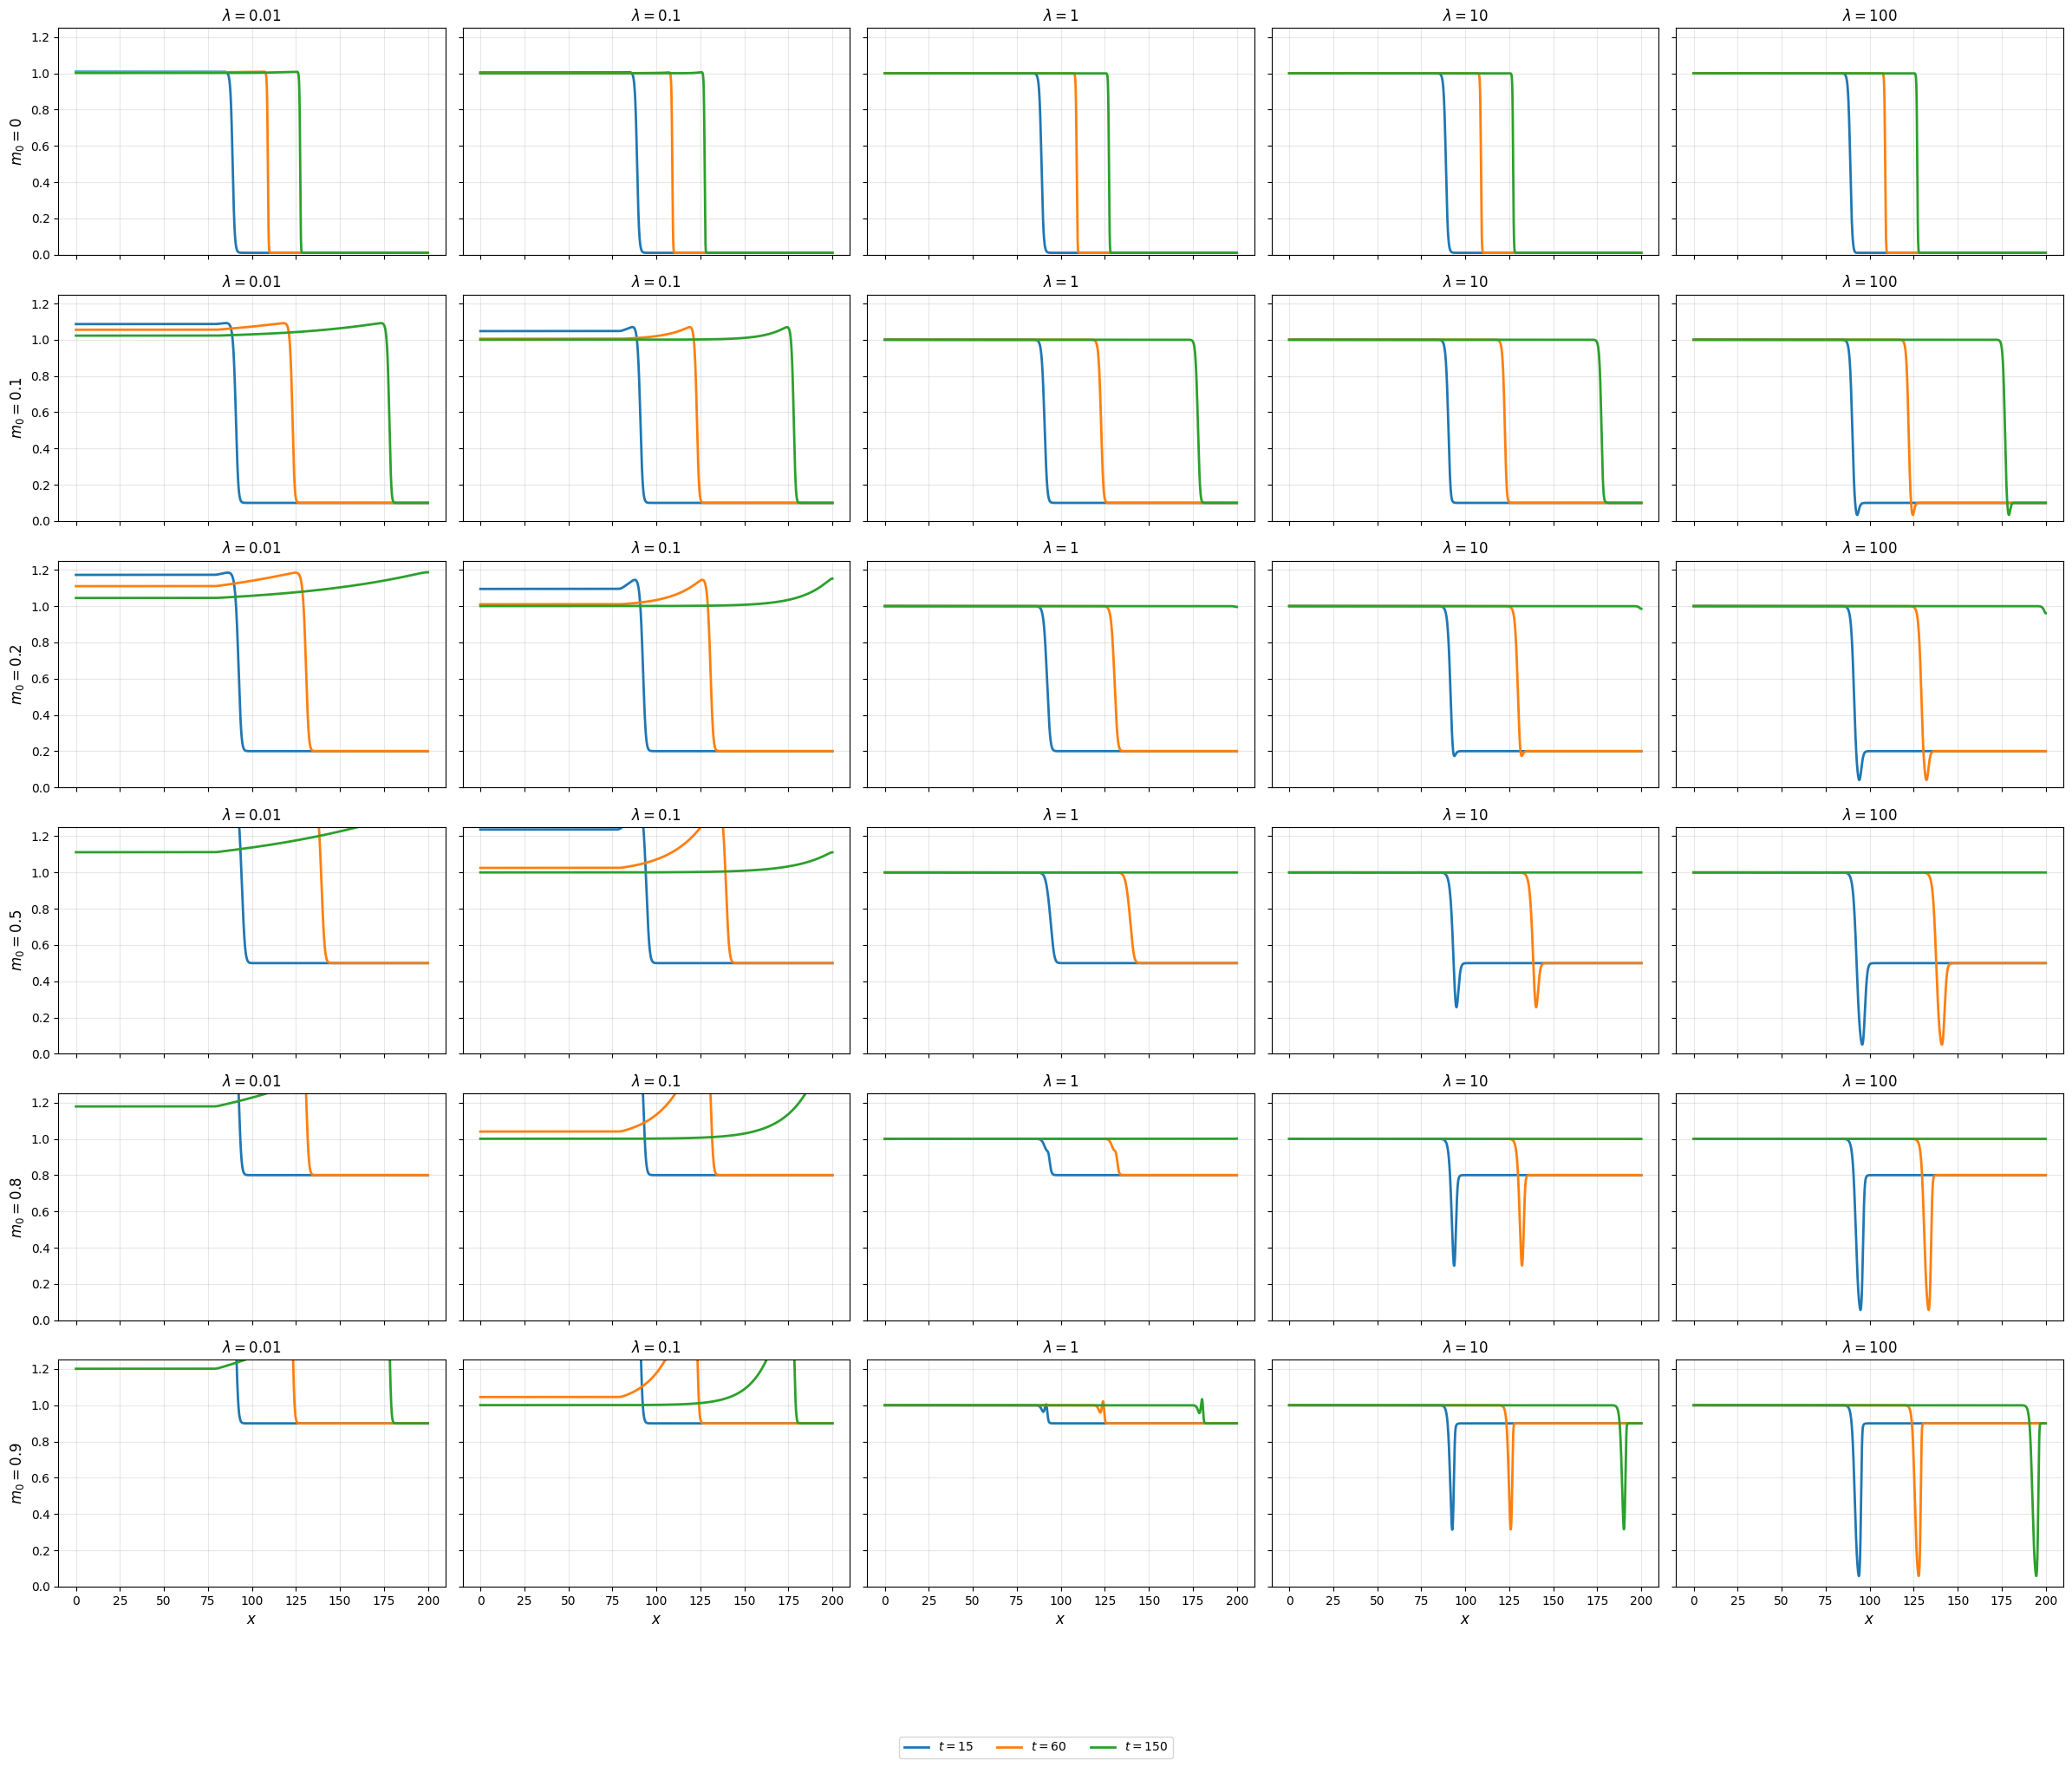

In [12]:
# 1) Spatial profiles of n+m at saved times (use the times inside snapshots.npz)
grid_spatial_sum_profile_nested(
    base_dir="speeds_plain_L200N20001",
    m0_rows=(0.0, 0.1, 0.2, 0.5, 0.8, 0.9),
    lambda_cols=(0.01, 0.1, 1,10, 100),
    use_times=(15, 60, 150),         
    ylim=(0, 1.25)                   
)

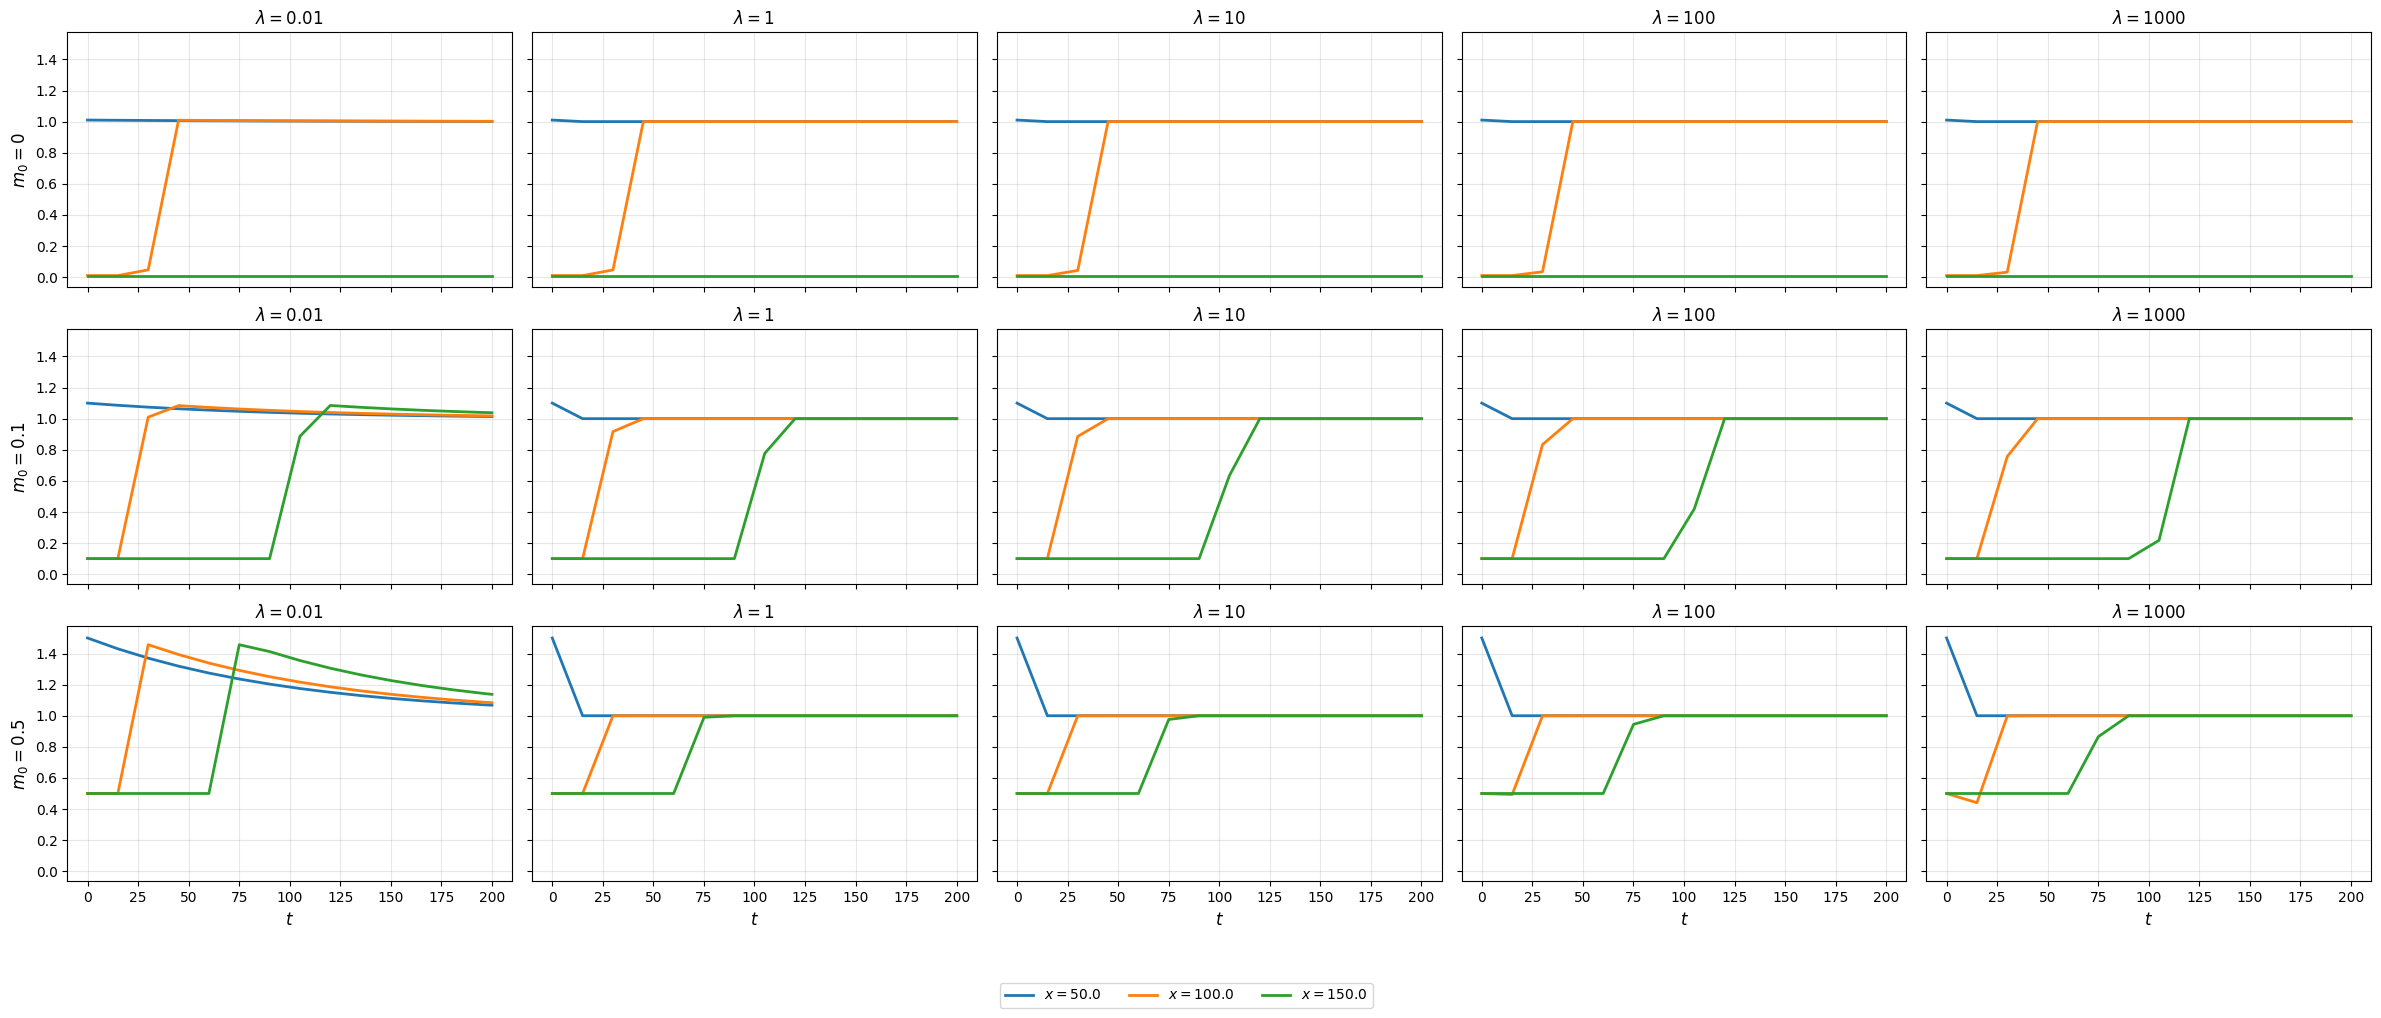

In [14]:
grid_time_traces_sum_nested(
    base_dir="speeds_plain_L200N20001",
    m0_rows=(0.0, 0.1, 0.5),
    lambda_cols=(0.01, 1, 10, 100, 1000),
    x_points=[50, 100, 150]          
)

In [ ]:
import os, re
import numpy as np
import matplotlib.pyplot as plt

def _closest_dir_by_number(parent, prefix, target):
    subs = [d for d in os.listdir(parent)
            if os.path.isdir(os.path.join(parent, d)) and d.startswith(prefix + "_")]
    if not subs:
        return None
    def _num(d):
        m = re.match(rf"{re.escape(prefix)}_([0-9eE\.\-]+)$", d)
        return float(m.group(1)) if m else None
    best = min(subs, key=lambda d: abs((_num(d) or 1e99) - target))
    return os.path.join(parent, best)

def _get_run_dir(base_dir, lam, m0):
    lam_dir = os.path.join(base_dir, f"lambda_{lam}")
    if not os.path.isdir(lam_dir):
        lam_dir = _closest_dir_by_number(base_dir, "lambda", lam)
    if lam_dir is None:
        return None
    run_dir = os.path.join(lam_dir, f"m0_{m0}")
    if not os.path.isdir(run_dir):
        run_dir = _closest_dir_by_number(lam_dir, "m0", m0)
    return run_dir

def _load_snapshots(run_dir):
    p = os.path.join(run_dir, "snapshots.npz")
    if not (run_dir and os.path.exists(p)):
        return None
    z = np.load(p)
    return z["times"], z["x"], z["N_arr"], z["M_arr"]

def plot_total_nm_over_time(
    base_dir,
    lambda_val,
    m0_values,
    normalise=False
):
    plt.figure(figsize=(8, 5))

    for m0_val in m0_values:
        run_dir = _get_run_dir(base_dir, lambda_val, m0_val)
        snaps = _load_snapshots(run_dir)
        if snaps is None:
            print(f"⚠ No snapshots for m0={m0_val}")
            continue
        times, x, N_arr, M_arr = snaps

        # Make sure shape is (Nt, Nx)
        if N_arr.shape[0] == x.size:
            N_arr = N_arr.T
        if M_arr.shape[0] == x.size:
            M_arr = M_arr.T

        nm_sum = N_arr + M_arr
        total_nm = np.trapz(nm_sum, x, axis=1)
        if normalise:
            total_nm /= np.max(total_nm)

        plt.plot(times, total_nm, lw=2, label=fr"$m_0 = {m0_val}$")

    plt.xlabel("Time $t$")
    plt.ylabel(r"$\int (n+m)\,dx$")
    plt.title(fr"Total $n+m$ over time, $\lambda={lambda_val}$")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

⚠ No snapshots for m0=0


/var/folders/db/nfyhgnf50fxd8qjfrpdb671c0000gn/T/ipykernel_37927/163963491.py:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_nm = np.trapz(nm_sum, x, axis=1)


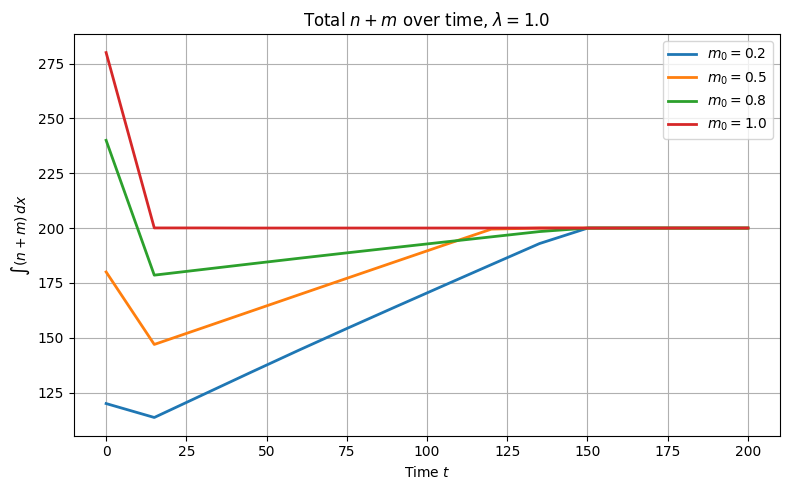

In [23]:
# Example usage:
plot_total_nm_over_time(
    base_dir="speeds_plain_L200N20001",
    lambda_val=1.0,
    m0_values=[0, 0.2, 0.5, 0.8, 1.0],
    normalise=False)

In [25]:
import os, re
import numpy as np
import matplotlib.pyplot as plt

def _closest_dir_by_number(parent, prefix, target):
    subs = [d for d in os.listdir(parent)
            if os.path.isdir(os.path.join(parent, d)) and d.startswith(prefix + "_")]
    if not subs:
        return None
    def _num(d):
        m = re.match(rf"{re.escape(prefix)}_([0-9eE\.\-]+)$", d)
        return float(m.group(1)) if m else None
    best = min(subs, key=lambda d: abs((_num(d) or 1e99) - target))
    return os.path.join(parent, best)

def _get_run_dir(base_dir, lam, m0):
    lam_dir = os.path.join(base_dir, f"lambda_{lam}")
    if not os.path.isdir(lam_dir):
        lam_dir = _closest_dir_by_number(base_dir, "lambda", lam)
    if lam_dir is None:
        return None
    run_dir = os.path.join(lam_dir, f"m0_{m0}")
    if not os.path.isdir(run_dir):
        run_dir = _closest_dir_by_number(lam_dir, "m0", m0)
    return run_dir

def _load_snapshots(run_dir):
    p = os.path.join(run_dir, "snapshots.npz")
    if not (run_dir and os.path.exists(p)):
        return None
    z = np.load(p)
    times = z["times"]
    x     = z["x"]
    N_arr = z["N_arr"]
    M_arr = z["M_arr"]
    # Ensure (Nt, Nx)
    if N_arr.shape[0] == x.size and N_arr.shape[-1] == times.size:
        N_arr = N_arr.T
    if M_arr.shape[0] == x.size and M_arr.shape[-1] == times.size:
        M_arr = M_arr.T
    return times, x, N_arr, M_arr

def plot_total_nm_over_time_grid(
    base_dir,
    lambda_vals,            # tuple/list of lambdas
    m0_values,              # tuple/list of m0s
    normalise=False,
    ncols=None,
    figsize_per_col=4.5,
    figsize_height=4.0,
    sharey=True
):
    lambda_vals = list(lambda_vals)
    m0_values   = list(m0_values)

    if ncols is None:
        ncols = min(4, len(lambda_vals))
    nrows = int(np.ceil(len(lambda_vals) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize_per_col*ncols, figsize_height*nrows),
                             squeeze=False, sharex=False, sharey=sharey)
    axes = axes.flatten()

    cmap = plt.get_cmap("tab10")

    # collect one legend entry per distinct m0, first time it gets plotted anywhere
    legend_handles, legend_labels = [], []
    seen_m0 = set()

    for k, lam in enumerate(lambda_vals):
        ax = axes[k]
        for i, m0 in enumerate(m0_values):
            run_dir = _get_run_dir(base_dir, lam, m0)
            snaps = _load_snapshots(run_dir)
            if snaps is None:
                # print once per missing combo (optional)
                # print(f"⚠ No snapshots for λ={lam}, m0={m0}")
                continue

            times, x, N_arr, M_arr = snaps
            nm_sum = N_arr + M_arr
            total_nm = np.trapezoid(nm_sum, x, axis=1)
            if normalise and abs(total_nm[0]) > 0:
                total_nm = total_nm / total_nm[0]

            color = cmap(i % 10)
            (ln,) = ax.plot(times, total_nm, lw=2, color=color, label=rf"$m_0={m0:g}$")

            if m0 not in seen_m0:
                legend_handles.append(ln)
                legend_labels.append(rf"$m_0={m0:g}$")
                seen_m0.add(m0)

        ax.grid(True, alpha=0.4)
        ax.set_title(rf"$\lambda={lam:g}$", fontsize=12)
        ax.set_xlabel(r"$t$", fontsize=11)
        if sharey and (k % ncols == 0):
            ax.set_ylabel(r"$\int (n+m)\,dx$" + (r" (normalised)" if normalise else ""), fontsize=11)

    # hide unused axes
    for k in range(len(lambda_vals), len(axes)):
        axes[k].set_visible(False)

    if legend_handles:
        fig.legend(legend_handles, legend_labels, loc="lower center",
                   ncol=min(len(legend_labels), 6), frameon=True,
                   fontsize=10, bbox_to_anchor=(0.5, -0.02))

    plt.tight_layout(rect=[0, 0.05, 1, 0.98])
    plt.show()

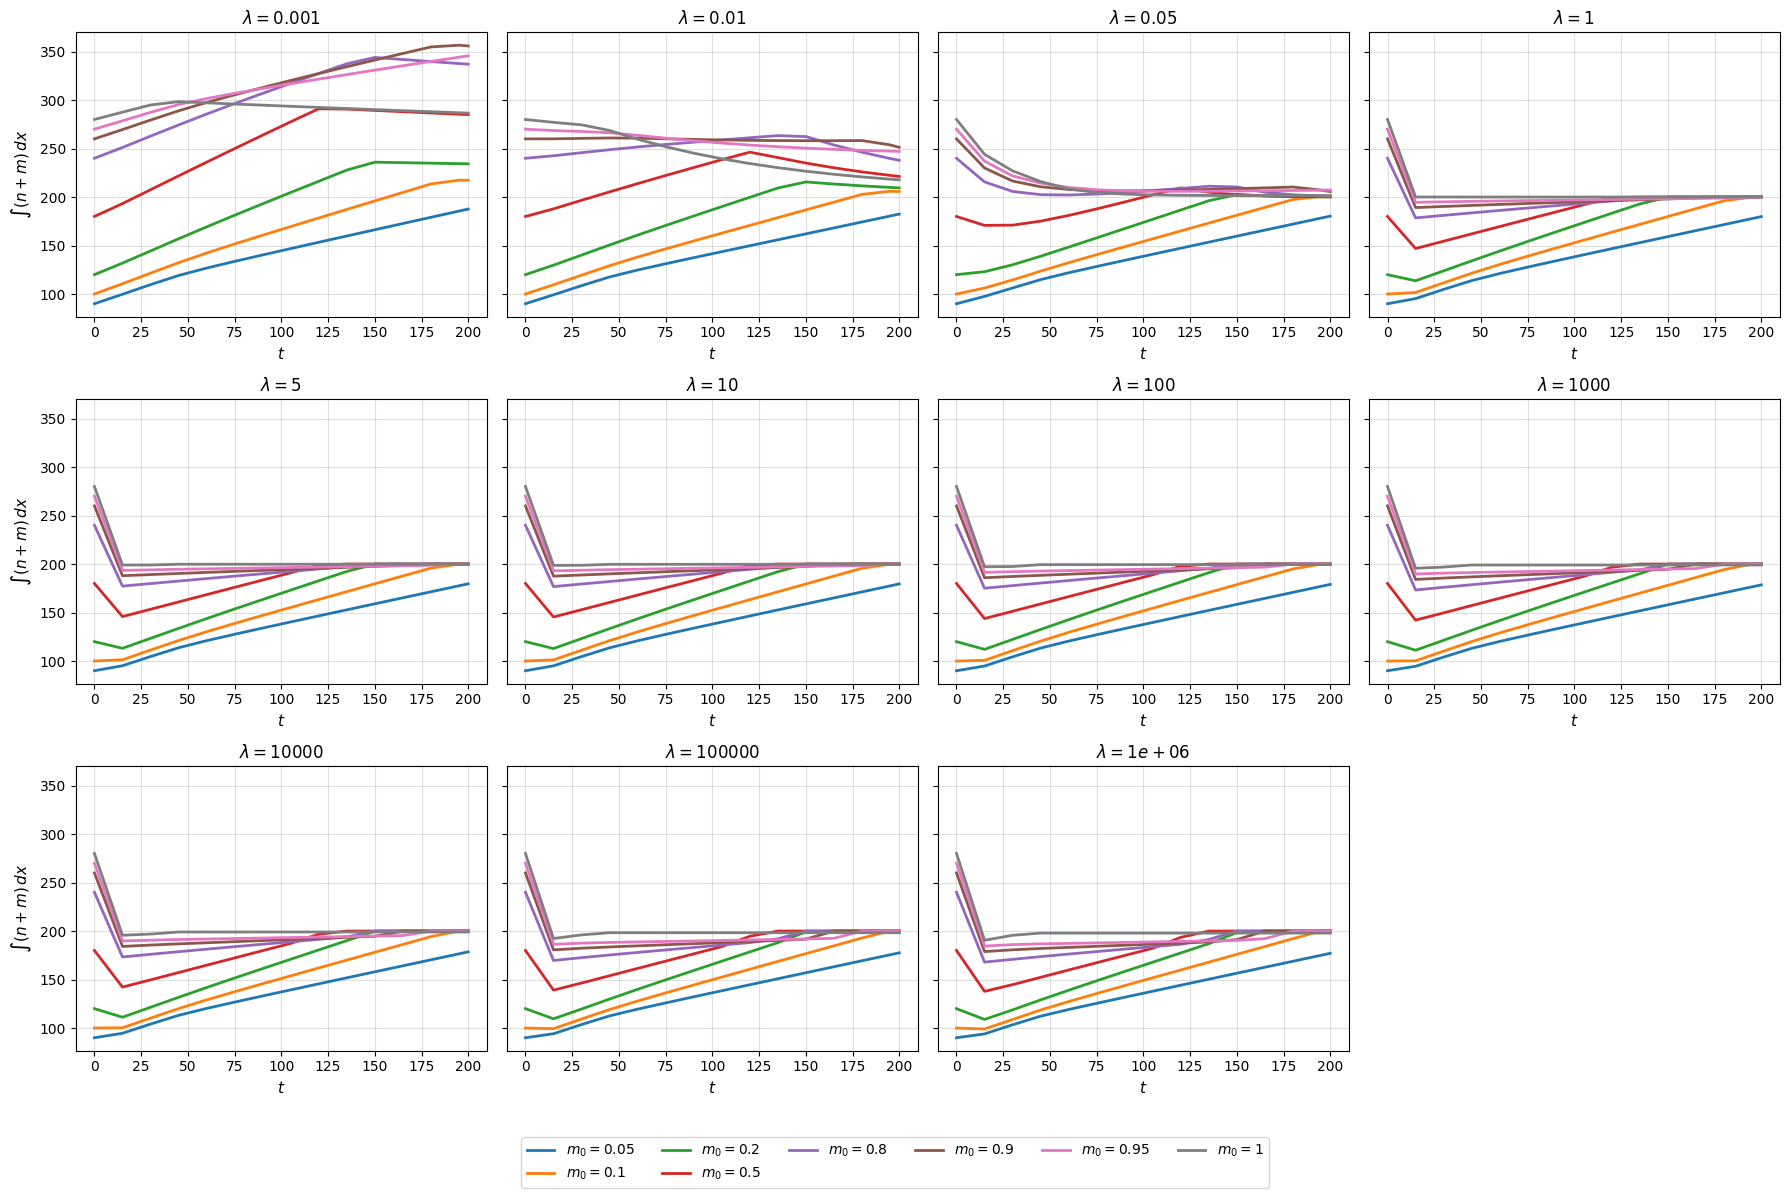

In [26]:
# ---------------- Example call ----------------
plot_total_nm_over_time_grid(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 10000, 100000, 1000000),
    m0_values=(0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0),
    normalise=False,
    ncols=4
)

In [14]:
import os, re, json
import numpy as np

def _exact_dir(parent, prefix, val):
    d = os.path.join(parent, f"{prefix}_{val}")
    return d if os.path.isdir(d) else None

def _closest_dir_by_number(parent, prefix, target):
    """Pick the subdir prefix_* whose numeric suffix is closest to target."""
    if not os.path.isdir(parent):
        return None
    cands = [d for d in os.listdir(parent)
             if os.path.isdir(os.path.join(parent, d)) and d.startswith(prefix + "_")]
    if not cands:
        return None
    def _num(name):
        m = re.match(rf"{re.escape(prefix)}_([0-9eE\.\-]+)$", name)
        return float(m.group(1)) if m else None
    pairs = [(d, _num(d)) for d in cands]
    best = min(pairs, key=lambda p: abs((p[1] if p[1] is not None else 1e99) - target))[0]
    return os.path.join(parent, best)

def _get_run_dir(base_dir, lam, m0):
    """Match speeds_plain/.../lambda_*/m0_*  (exact first, then closest)."""
    base_dir = os.path.abspath(base_dir)
    lam_dir = _exact_dir(base_dir, "lambda", lam) or _closest_dir_by_number(base_dir, "lambda", lam)
    if lam_dir is None:
        return None
    m0_dir = _exact_dir(lam_dir, "m0", m0) or _closest_dir_by_number(lam_dir, "m0", m0)
    return m0_dir

def _load_speed(run_dir, which="N"):
    """
    Read wave speed from summary.json.
    Keys used:
      'wave_speed' (tumour/N) and optionally 'm_wave_speed' (ECM/M).
    """
    if run_dir is None:
        return np.nan
    s = os.path.join(run_dir, "summary.json")
    if not os.path.exists(s):
        return np.nan
    try:
        with open(s, "r") as f:
            meta = json.load(f)
        if which.upper() == "M":
            return float(meta.get("m_wave_speed", np.nan))
        return float(meta.get("wave_speed", np.nan))
    except Exception:
        return np.nan

In [15]:
def plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.001, 0.01, 0.05, 1, 5, 10, 100, 1000),
    m0_vals=(0.0, 0.1, 0.5, 1.0),
    n_label=r"$m_0$",
    x_label=r"$\lambda$",
    title="Wave speed heatmap",
    which_speed="N",
    annotate=False,
    cmap="viridis",
    vmin=None, vmax=None,
    log_lambda_ticks=False,

    # style tweaks
    tick_fs=16, label_fs=18, title_fs=20, cbar_fs=16,
    grid_alpha=0.0,   # 0 => no box lines; e.g. 0.15 for faint
    ann_fs=12
):
    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)

    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            run_dir = _get_run_dir(base_dir, lam, m0)
            H[i, j] = _load_speed(run_dir, which=which_speed)

    fig, ax = plt.subplots(figsize=(1.1*len(lambda_vals)+2, 0.75*len(m0_vals)+2))
    im = ax.imshow(H, aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)

    ax.set_yticks(np.arange(len(m0_vals)))
    ax.set_yticklabels([f"{m0:g}" for m0 in m0_vals], fontsize=tick_fs)
    ax.set_ylabel(n_label, fontsize=label_fs)

    ax.set_xticks(np.arange(len(lambda_vals)))
    if log_lambda_ticks:
        ax.set_xticklabels([rf"$10^{{{int(np.log10(lam))}}}$" if lam > 0 else "0"
                            for lam in lambda_vals], fontsize=tick_fs)
    else:
        ax.set_xticklabels([f"{lam:g}" for lam in lambda_vals], fontsize=tick_fs)
    ax.set_xlabel(x_label, fontsize=label_fs)

    ax.set_title(title, fontsize=title_fs)

    # optional faint gridlines
    ax.set_xticks(np.arange(-.5, len(lambda_vals), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(m0_vals), 1), minor=True)
    if grid_alpha > 0:
        ax.grid(which='minor', color='w', linestyle='-', linewidth=0.6, alpha=grid_alpha)
    else:
        ax.grid(False)
    ax.tick_params(which='minor', bottom=False, left=False)

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(r"Wave speed $c$", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

    if annotate:
        for i in range(len(m0_vals)):
            for j in range(len(lambda_vals)):
                val = H[i, j]
                if np.isfinite(val):
                    ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                            fontsize=ann_fs, color='w')

    plt.tight_layout()
    plt.show()
    return H

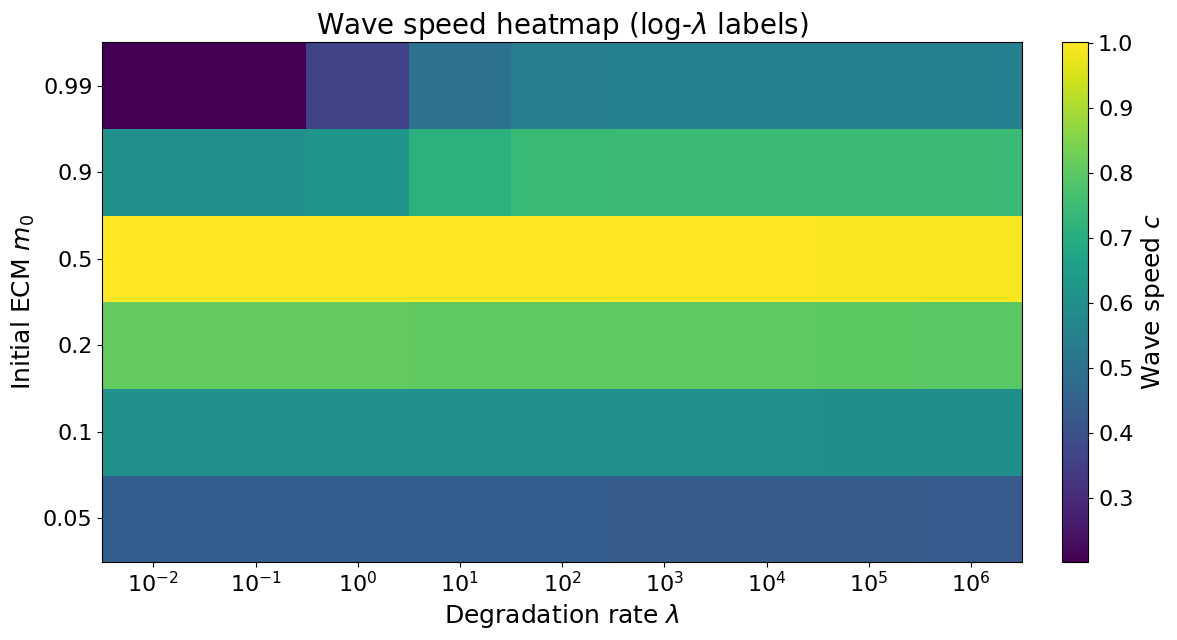

In [17]:
# Scientific labels + annotations
H2 = plot_speed_heatmap_nested(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    n_label=r"Initial ECM $m_0$",
    x_label=r"Degradation rate $\lambda$",
    title=r"Wave speed heatmap (log-$\lambda$ labels)",
    which_speed="N",
    log_lambda_ticks=True,
    annotate=False,
    tick_fs=16, label_fs=18, title_fs=20, cbar_fs=16, grid_alpha=0.0, ann_fs=12
)

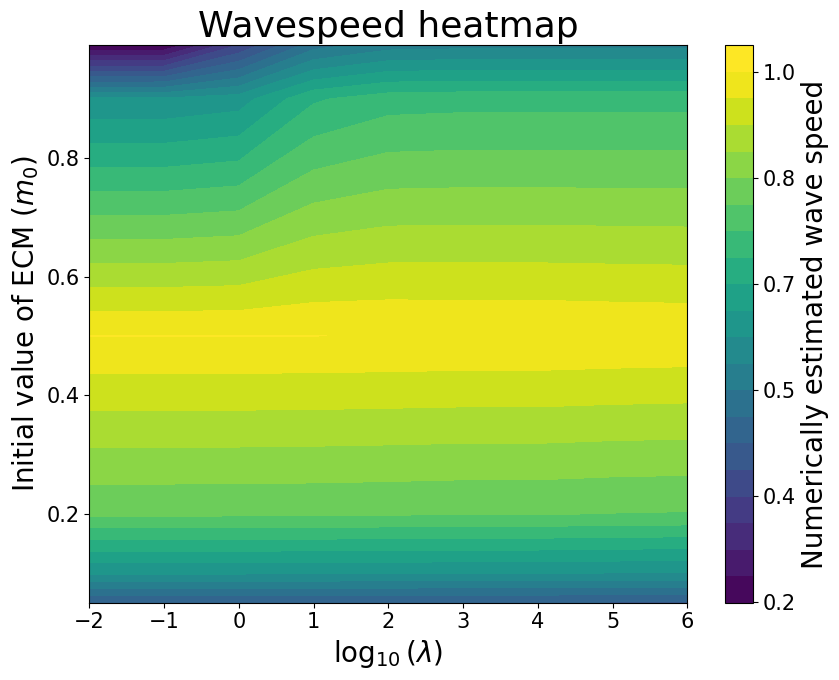

In [41]:
import os, re, json
import numpy as np
import matplotlib.pyplot as plt

# ---------- directory + speed loaders ----------
def _closest_dir_by_number(parent, prefix, target):
    if not os.path.isdir(parent):
        return None
    cands = [d for d in os.listdir(parent)
             if os.path.isdir(os.path.join(parent, d)) and d.startswith(prefix + "_")]
    if not cands:
        return None
    def _num(name):
        m = re.match(rf"{re.escape(prefix)}_([0-9eE\.\-]+)$", name)
        return float(m.group(1)) if m else None
    pairs = [(d, _num(d)) for d in cands]
    best = min(pairs, key=lambda p: abs((p[1] if p[1] is not None else 1e99) - target))[0]
    return os.path.join(parent, best)

def _get_run_dir(base_dir, lam, m0):
    base_dir = os.path.abspath(base_dir)
    lam_dir = _closest_dir_by_number(base_dir, "lambda", float(lam))
    if lam_dir is None:
        return None
    m0_dir  = _closest_dir_by_number(lam_dir, "m0", float(m0))
    return m0_dir

def _load_speed(run_dir, which="N"):
    if run_dir is None:
        return np.nan
    s = os.path.join(run_dir, "summary.json")
    if not os.path.exists(s):
        return np.nan
    try:
        with open(s, "r") as f:
            meta = json.load(f)
        key = "wave_speed" if which.upper() == "N" else "m_wave_speed"
        val = meta.get(key, np.nan)
        return float(val) if val is not None else np.nan
    except Exception:
        return np.nan

# ---------- plotting ----------
def plot_wavespeed_heatmap(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    which_speed="N",
    cmap="viridis",
    levels=20,           # smoother bands
    fig_size=(8.6, 6.9),
    tick_fs=15, label_fs=20, title_fs=26, cbar_fs=15,
    debug=False
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    # Build speed matrix H
    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _get_run_dir(base_dir, lam, m0)
            H[i, j] = _load_speed(rd, which=which_speed)
            if debug:
                print(f"m0={m0:g}, lam={lam:g} -> {rd} -> {H[i,j]}")

    if not np.isfinite(H).any():
        fig, ax = plt.subplots(figsize=fig_size)
        ax.text(0.5, 0.5, "No speeds found (all NaN).\nCheck base_dir and file layout.",
                ha="center", va="center", fontsize=16, transform=ax.transAxes)
        ax.axis("off")
        plt.show()
        return H, (fig, ax)

    # Coordinates
    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)

    # Let the lower bound float, but ensure 0.0 is included for tick display
    data_min = np.nanmin(H)
    vmin_auto = float(np.nanmin(H))
    vmax_fixed = 1.0                 # cap top at 1

    fig, ax = plt.subplots(figsize=fig_size)

    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap, vmin=vmin_auto, vmax=1.0)

    # Labels / title
    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel(r"Initial value of ECM ($m_0$)", fontsize=label_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.set_title("Wavespeed heatmap", fontsize=title_fs)

    # Colorbar with fixed ticks 0..1 (1 dp)
    cbar = plt.colorbar(cf, ax=ax)
    ticks = np.linspace(vmin_auto, 1.0, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

    plt.tight_layout()
    plt.show()
    return H, (fig, ax)

# ---------- CALL ----------
H2, _ = plot_wavespeed_heatmap(
    base_dir="speeds_plain_L200N20001",
    lambda_vals=(0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000),
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    which_speed="N",
    cmap="viridis",
    levels=20,
    debug=False
)

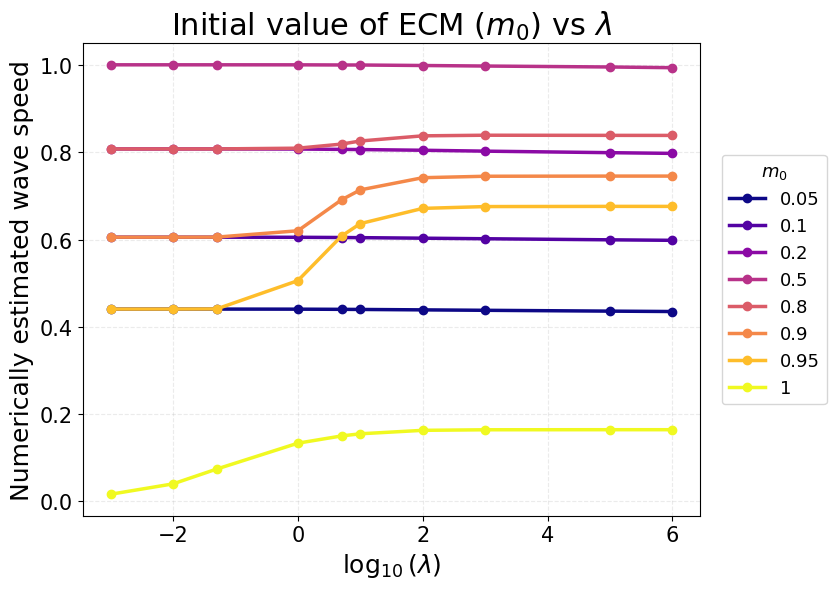

In [49]:
# plots_from_runs_plain_single.py
import os, json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Helpers to find/load runs
# -------------------------
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    """
    Extract the float from folder names like 'lambda_0.001' or 'm0_0.5'.
    Returns None if pattern doesn't match or float fails.
    """
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    """
    Look for a directory tree:
      base_dir / lambda_* / m0_* / (summary.json, snapshots.npz)
    that matches lam and m0 numerically (approx). Returns Path or None.
    """
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None

    # find a matching lambda_* folder
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None:
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None

    # inside it, find a matching m0_* folder
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None:
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    """Load summary.json (returns {} if missing)."""
    if run_dir is None:
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# -------------------------
# The styled single-figure plot
# -------------------------
def plot_speed_vs_log_lambda_single_styled(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6),
    cmap_name="plasma",
    ms=6, lw=2.5,
    tick_fs=15, label_fs=18, title_fs=22, legend_fs=13
):
    """
    Styled plot: wave speed vs log10(lambda) for multiple m0.
    Title = "Initial value of ECM (m0) vs lambda"
    Solid lines only, no dashed baselines.
    """
    base_dir = Path(base_dir)
    fig, ax = plt.subplots(figsize=(10, 6))

    # colormap spanning all m0 curves
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]

    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)

        speeds = np.asarray(speeds, dtype=float)

        # plot solid connected line with dots
        ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"
        )

    # axes styling
    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel("Numerically estimated wave speed", fontsize=label_fs)
    ax.set_title(r"Initial value of ECM $(m_0)$ vs $\lambda$", fontsize=title_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.grid(True, linestyle="--", alpha=0.25)

    # legend on the right
    ax.legend(
        title=r"$m_0$", fontsize=legend_fs, title_fontsize=legend_fs,
        loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
    )
    fig.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()
    return fig, ax

# -------------------------
# Example call
# -------------------------
if __name__ == "__main__":
    plot_speed_vs_log_lambda_single_styled(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6],
        cmap_name="plasma",
        ms=6, lw=2.5
    )

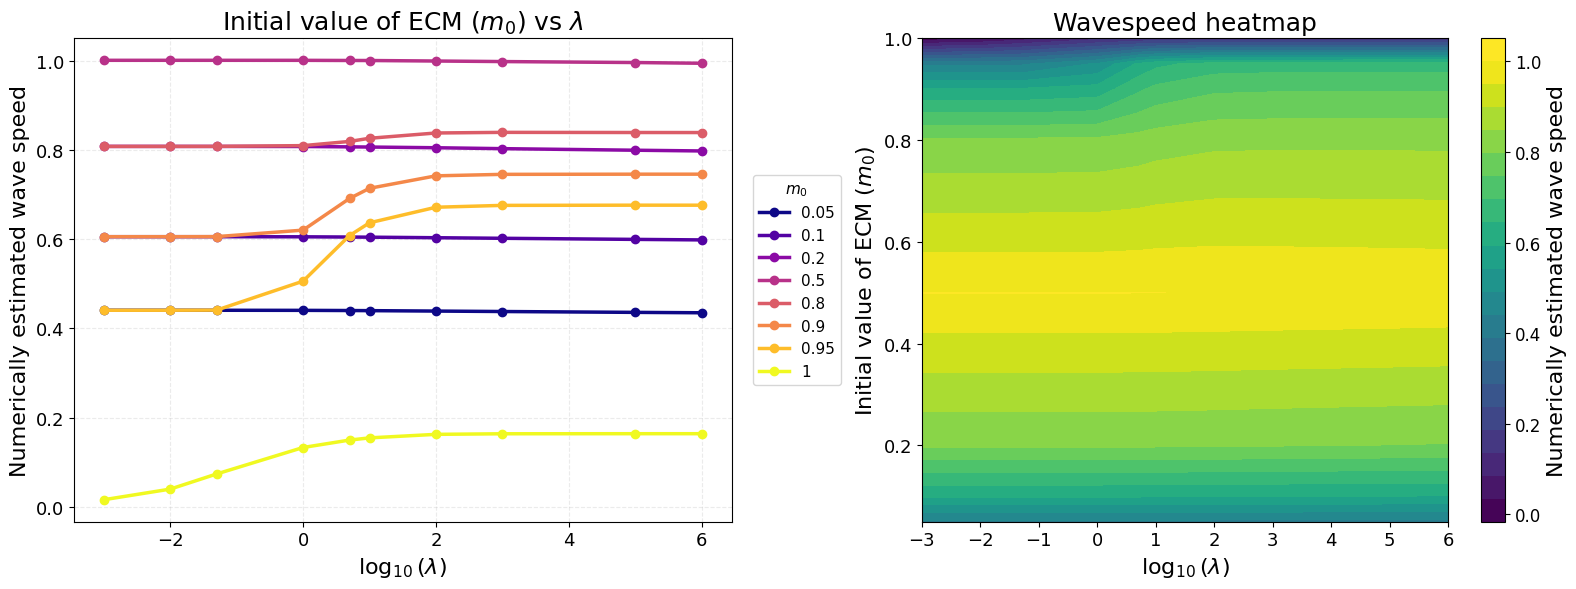

In [50]:
# plots_from_runs_plain_combo.py
import os, re, json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    """Extract float from folder names like 'lambda_0.001' or 'm0_0.5'."""
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    """Find run dir: base_dir/lambda_*/m0_*/summary.json"""
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None: continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None: continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None: return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=6, lw=2.5,
    tick_fs=13, label_fs=16, title_fs=18, legend_fs=11
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"
        )

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel("Numerically estimated wave speed", fontsize=label_fs)
    ax.set_title(r"Initial value of ECM $(m_0)$ vs $\lambda$", fontsize=title_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.grid(True, linestyle="--", alpha=0.25)
    ax.legend(
        title=r"$m_0$", fontsize=legend_fs, title_fontsize=legend_fs,
        loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
    tick_fs=13, label_fs=16, title_fs=18, cbar_fs=12
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0

    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap, vmin=vmin_auto, vmax=1.0)

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel(r"Initial value of ECM ($m_0$)", fontsize=label_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.set_title("Wavespeed heatmap", fontsize=title_fs)

    # colorbar
    cbar = plt.colorbar(cf, ax=ax)
    ticks = np.linspace(vmin_auto, 1.0, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6)
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    _plot_speed_vs_log_lambda_on_ax(ax1, base_dir, m0_vals, lambda_vals)
    _plot_wavespeed_heatmap_on_ax(ax2, base_dir, lambda_vals, m0_vals)

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
    )

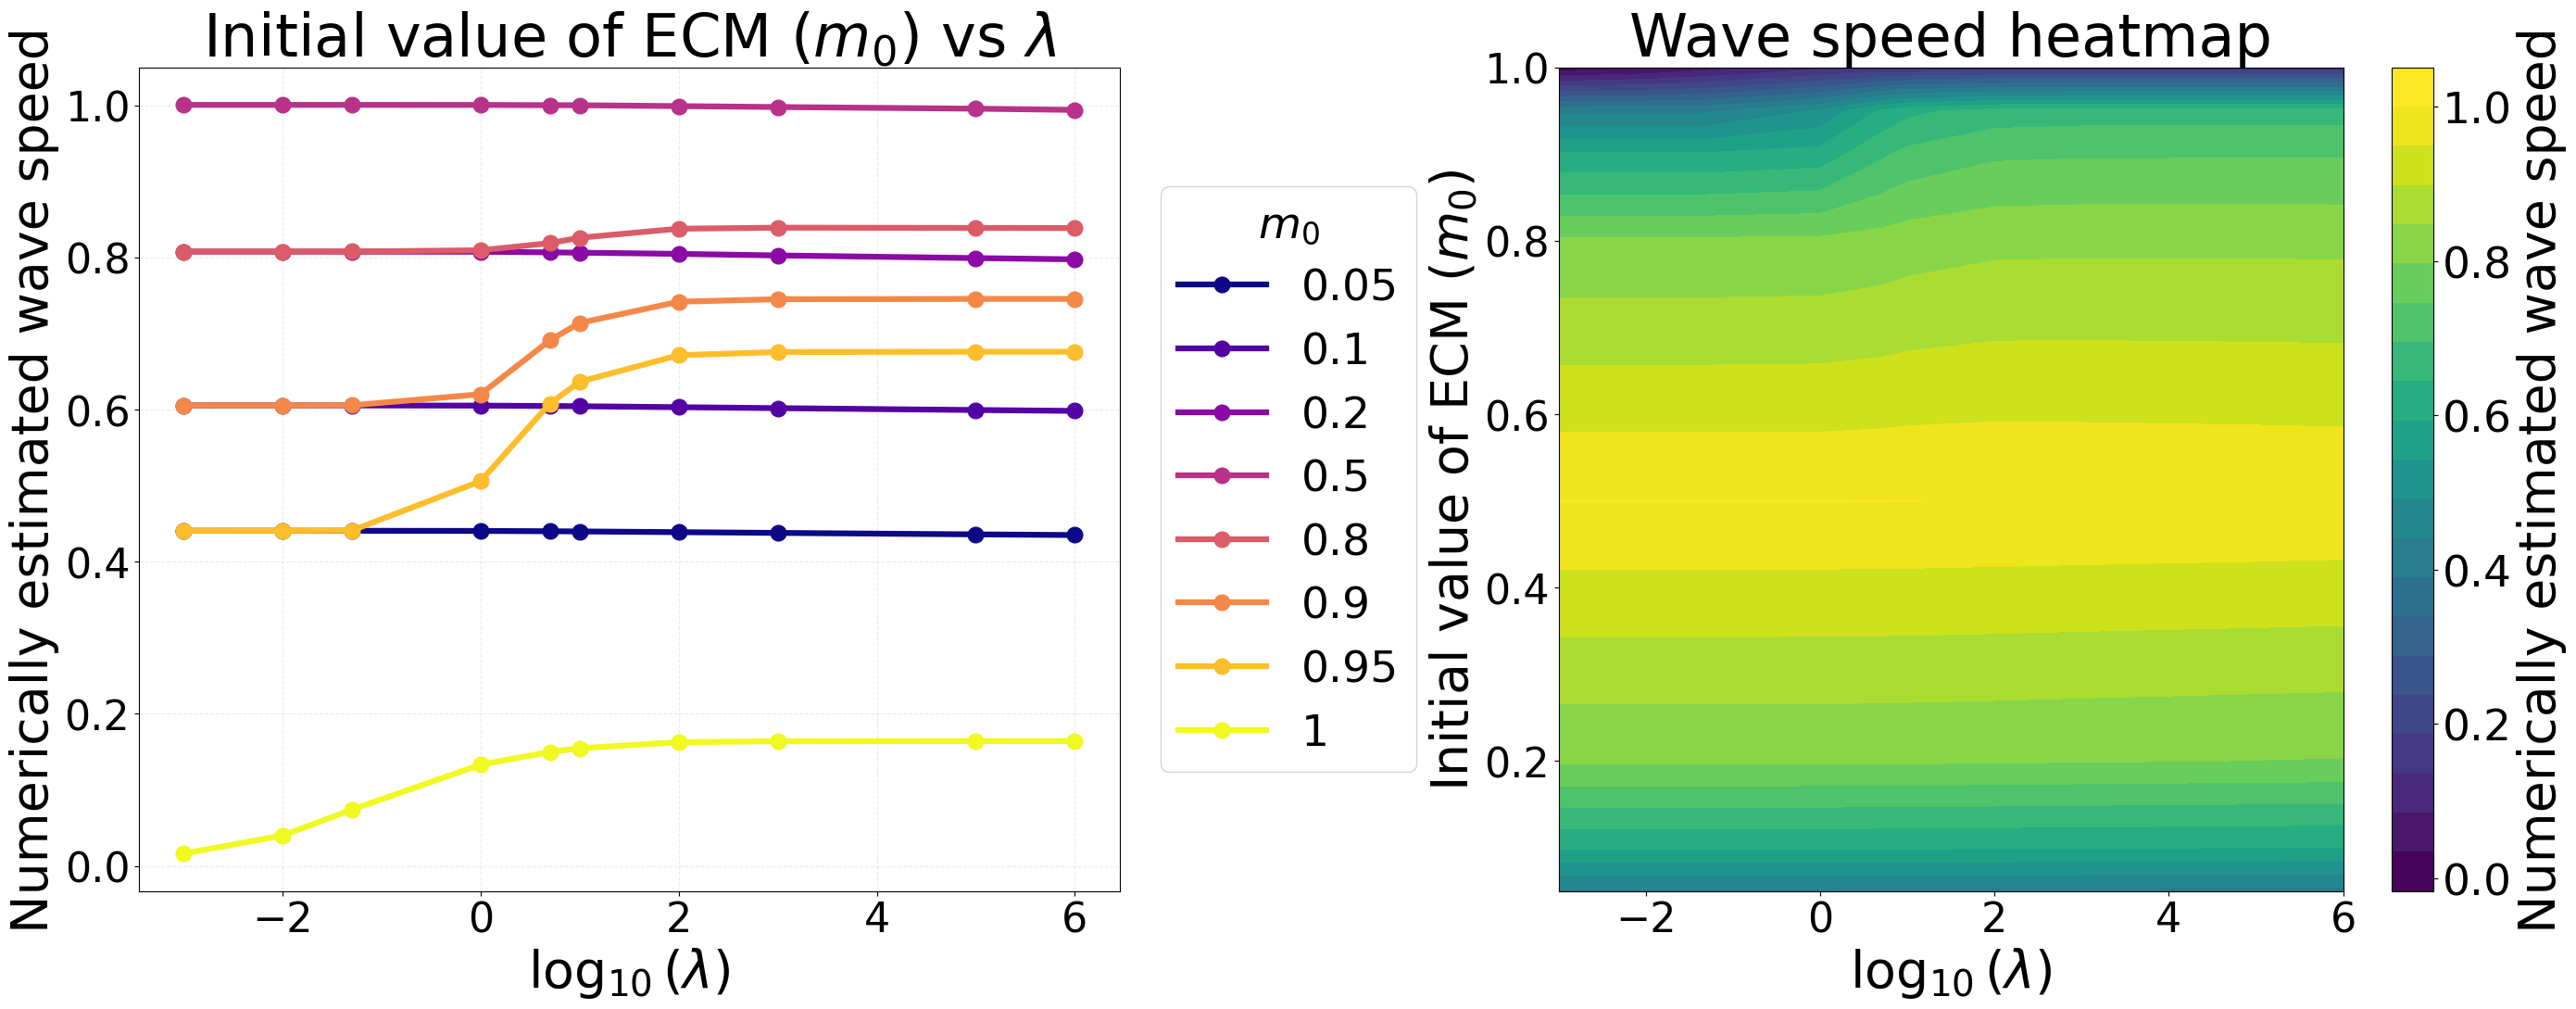

In [59]:
# plots_from_runs_plain_combo_BIG.py
import os, json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None: 
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None: 
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None: 
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=10, lw=3.5,
    tick_fs=24, label_fs=30, title_fs=34, legend_fs=22
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"
        )

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel("Numerically estimated wave speed", fontsize=label_fs)
    ax.set_title(r"Initial value of ECM $(m_0)$ vs $\lambda$", fontsize=title_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.grid(True, linestyle="--", alpha=0.25)
    ax.legend(
        title=r"$m_0$", fontsize=legend_fs, title_fontsize=legend_fs,
        loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
    tick_fs=24, label_fs=30, title_fs=34, cbar_fs=22
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0

    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap, vmin=vmin_auto, vmax=1.0)

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel(r"Initial value of ECM ($m_0$)", fontsize=label_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.set_title("Wave speed heatmap", fontsize=title_fs)

    # colorbar
    cbar = plt.colorbar(cf, ax=ax)
    ticks = np.linspace(vmin_auto, 1.0, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6)
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))  # much larger fig

    _plot_speed_vs_log_lambda_on_ax(ax1, base_dir, m0_vals, lambda_vals)
    _plot_wavespeed_heatmap_on_ax(ax2, base_dir, lambda_vals, m0_vals)

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6)
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 11))  # much larger fig

    _plot_speed_vs_log_lambda_on_ax(
        ax1, base_dir, m0_vals, lambda_vals,
        ms=12, lw=4.5,
        tick_fs=32, label_fs=40, title_fs=46, legend_fs=34
    )
    _plot_wavespeed_heatmap_on_ax(
        ax2, base_dir, lambda_vals, m0_vals,
        tick_fs=32, label_fs=40, title_fs=46, cbar_fs=34
    )

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
    )

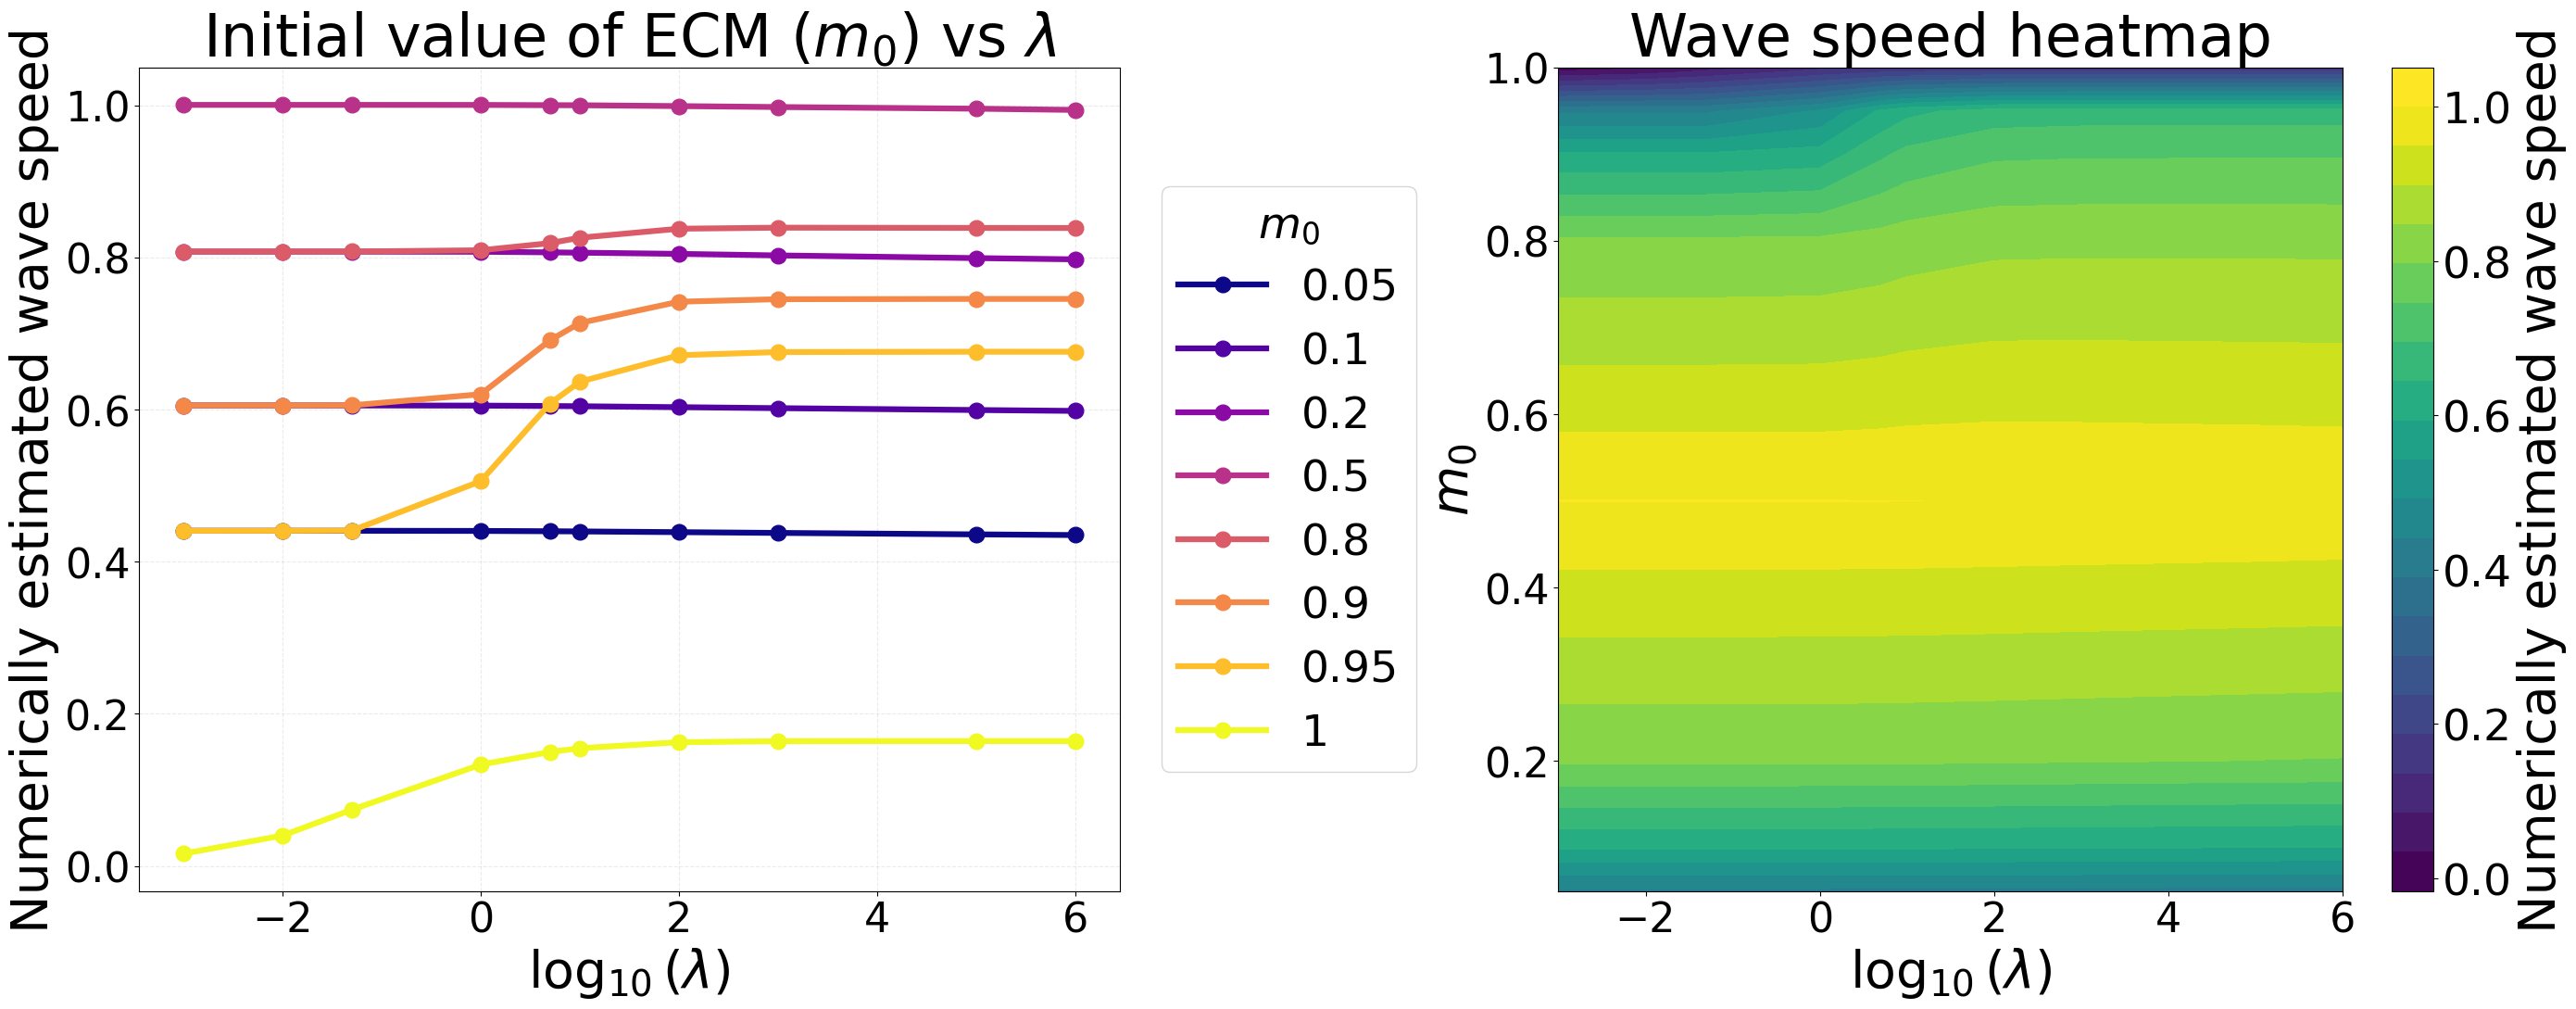

In [3]:
# plots_from_runs_plain_combo_BIG.py
import os, json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None: 
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None: 
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None: 
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=10, lw=3.5,
    tick_fs=24, label_fs=30, title_fs=34, legend_fs=22
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"
        )

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel("Numerically estimated wave speed", fontsize=label_fs)
    ax.set_title(r"Initial value of ECM $(m_0)$ vs $\lambda$", fontsize=title_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.grid(True, linestyle="--", alpha=0.25)
    ax.legend(
        title=r"$m_0$", fontsize=legend_fs, title_fontsize=legend_fs,
        loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
    tick_fs=24, label_fs=30, title_fs=34, cbar_fs=22
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0

    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap, vmin=vmin_auto, vmax=1.0)

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel(r"$m_0$", fontsize=label_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.set_title("Wave speed heatmap", fontsize=title_fs)

    # colorbar
    cbar = plt.colorbar(cf, ax=ax)
    ticks = np.linspace(vmin_auto, 1.0, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6)
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))  # much larger fig

    _plot_speed_vs_log_lambda_on_ax(ax1, base_dir, m0_vals, lambda_vals)
    _plot_wavespeed_heatmap_on_ax(ax2, base_dir, lambda_vals, m0_vals)

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6), fs=(28,11)
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 11))  # much larger fig

    _plot_speed_vs_log_lambda_on_ax(
        ax1, base_dir, m0_vals, lambda_vals,
        ms=12, lw=4.5,
        tick_fs=32, label_fs=40, title_fs=46, legend_fs=34
    )
    _plot_wavespeed_heatmap_on_ax(
        ax2, base_dir, lambda_vals, m0_vals,
        tick_fs=32, label_fs=40, title_fs=46, cbar_fs=34
    )

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6]
    )

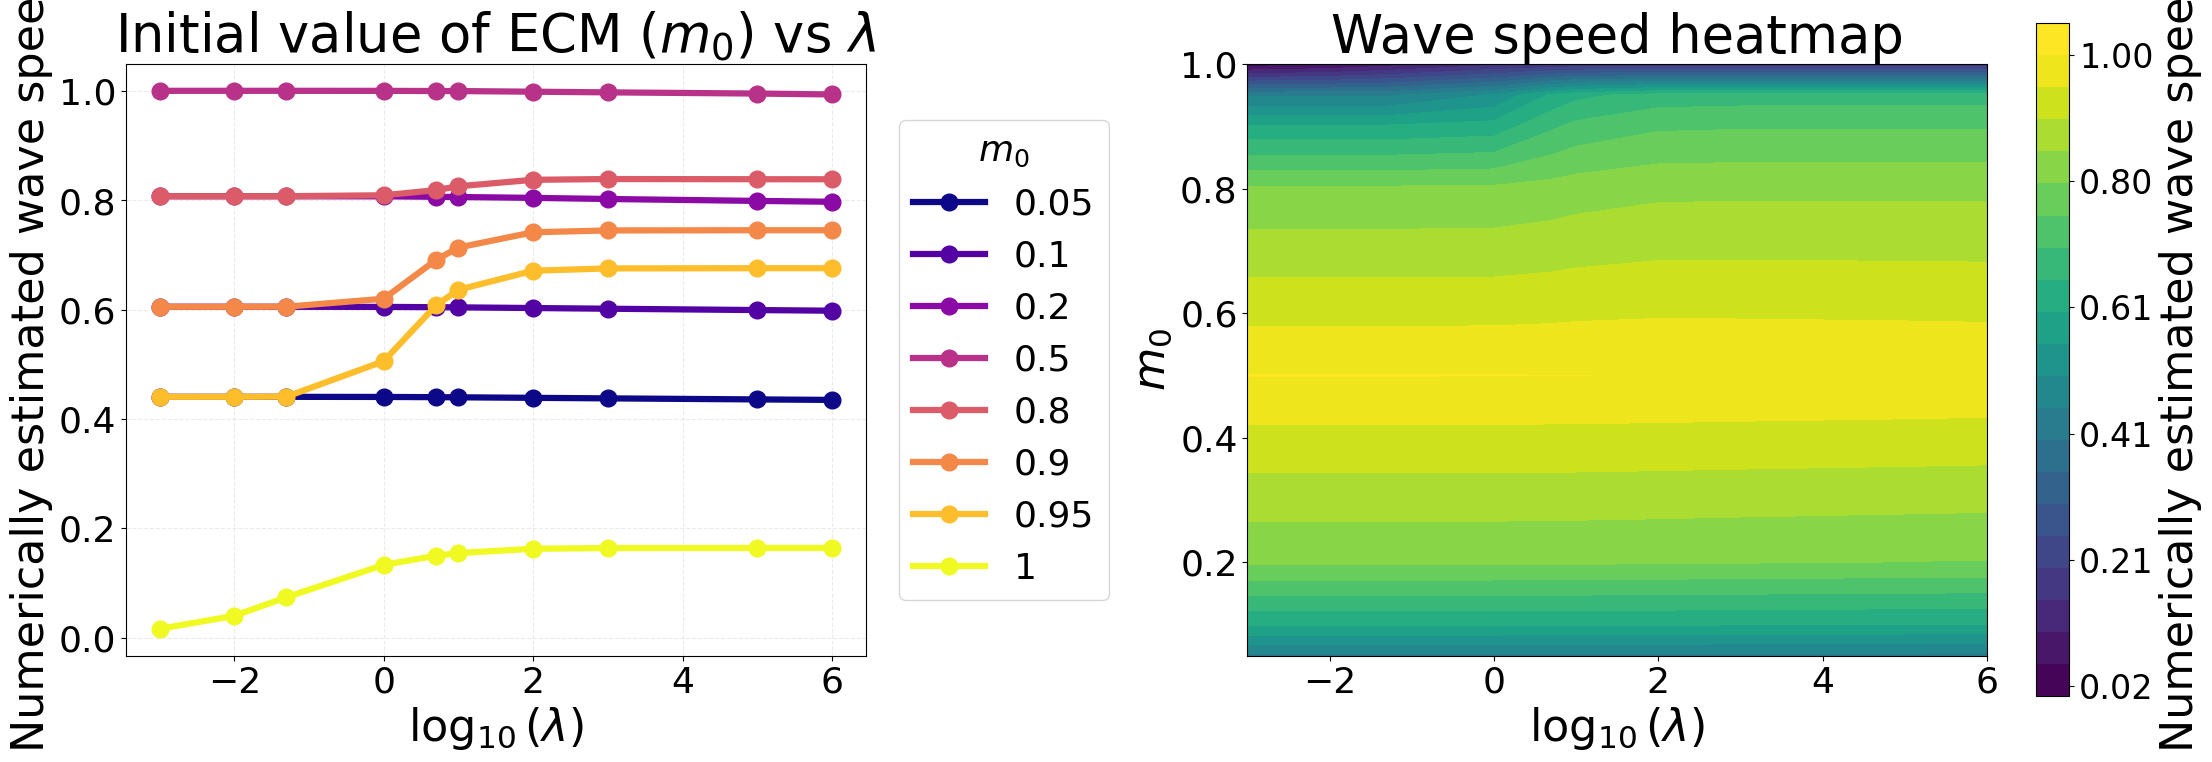

In [20]:
# plots_from_runs_plain_combo_LONG.py
import os, json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None: 
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None: 
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None: 
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=10, lw=3.5,
    tick_fs=24, label_fs=30, title_fs=34, legend_fs=22
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"
        )

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel("Numerically estimated wave speed", fontsize=label_fs)
    ax.set_title(r"Initial value of ECM $(m_0)$ vs $\lambda$", fontsize=title_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.grid(True, linestyle="--", alpha=0.25)
    ax.legend(
        title=r"$m_0$", fontsize=legend_fs, title_fontsize=legend_fs,
        loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
    tick_fs=24, label_fs=30, title_fs=34, cbar_fs=22
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0
    vmax_auto = float(np.nanmax(H)) if np.isfinite(H).any() else 1.0
    if vmin_auto == vmax_auto:
        vmax_auto = vmin_auto + 1e-9

    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap, vmin=vmin_auto, vmax=vmax_auto)

    ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=label_fs)
    ax.set_ylabel(r"$m_0$", fontsize=label_fs)
    ax.tick_params(axis="both", labelsize=tick_fs)
    ax.set_title("Wave speed heatmap", fontsize=title_fs)

    cbar = plt.colorbar(cf, ax=ax)
    ticks = np.linspace(vmin_auto, vmax_auto, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.2f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", fontsize=label_fs)
    cbar.ax.tick_params(labelsize=cbar_fs)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6),
    *,
    figsize=(24, 7),
    box_aspect=0.45   # HEIGHT / WIDTH → smaller = flatter, larger = taller
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, constrained_layout=True)

    _plot_speed_vs_log_lambda_on_ax(
        ax1, base_dir, m0_vals, lambda_vals,
        ms=12, lw=4.5,
        tick_fs=26, label_fs=32, title_fs=38, legend_fs=26
    )
    _plot_wavespeed_heatmap_on_ax(
        ax2, base_dir, lambda_vals, m0_vals,
        tick_fs=26, label_fs=32, title_fs=38, cbar_fs=24
    )

    # Apply custom aspect ratio
    ax1.set_box_aspect(box_aspect)
    ax2.set_box_aspect(box_aspect)

    plt.show()
    return fig, (ax1, ax2)

# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6],
        figsize=(22, 8),   # overall figure size
        box_aspect=0.8 # try 0.55 for "a bit more vertical"
    )

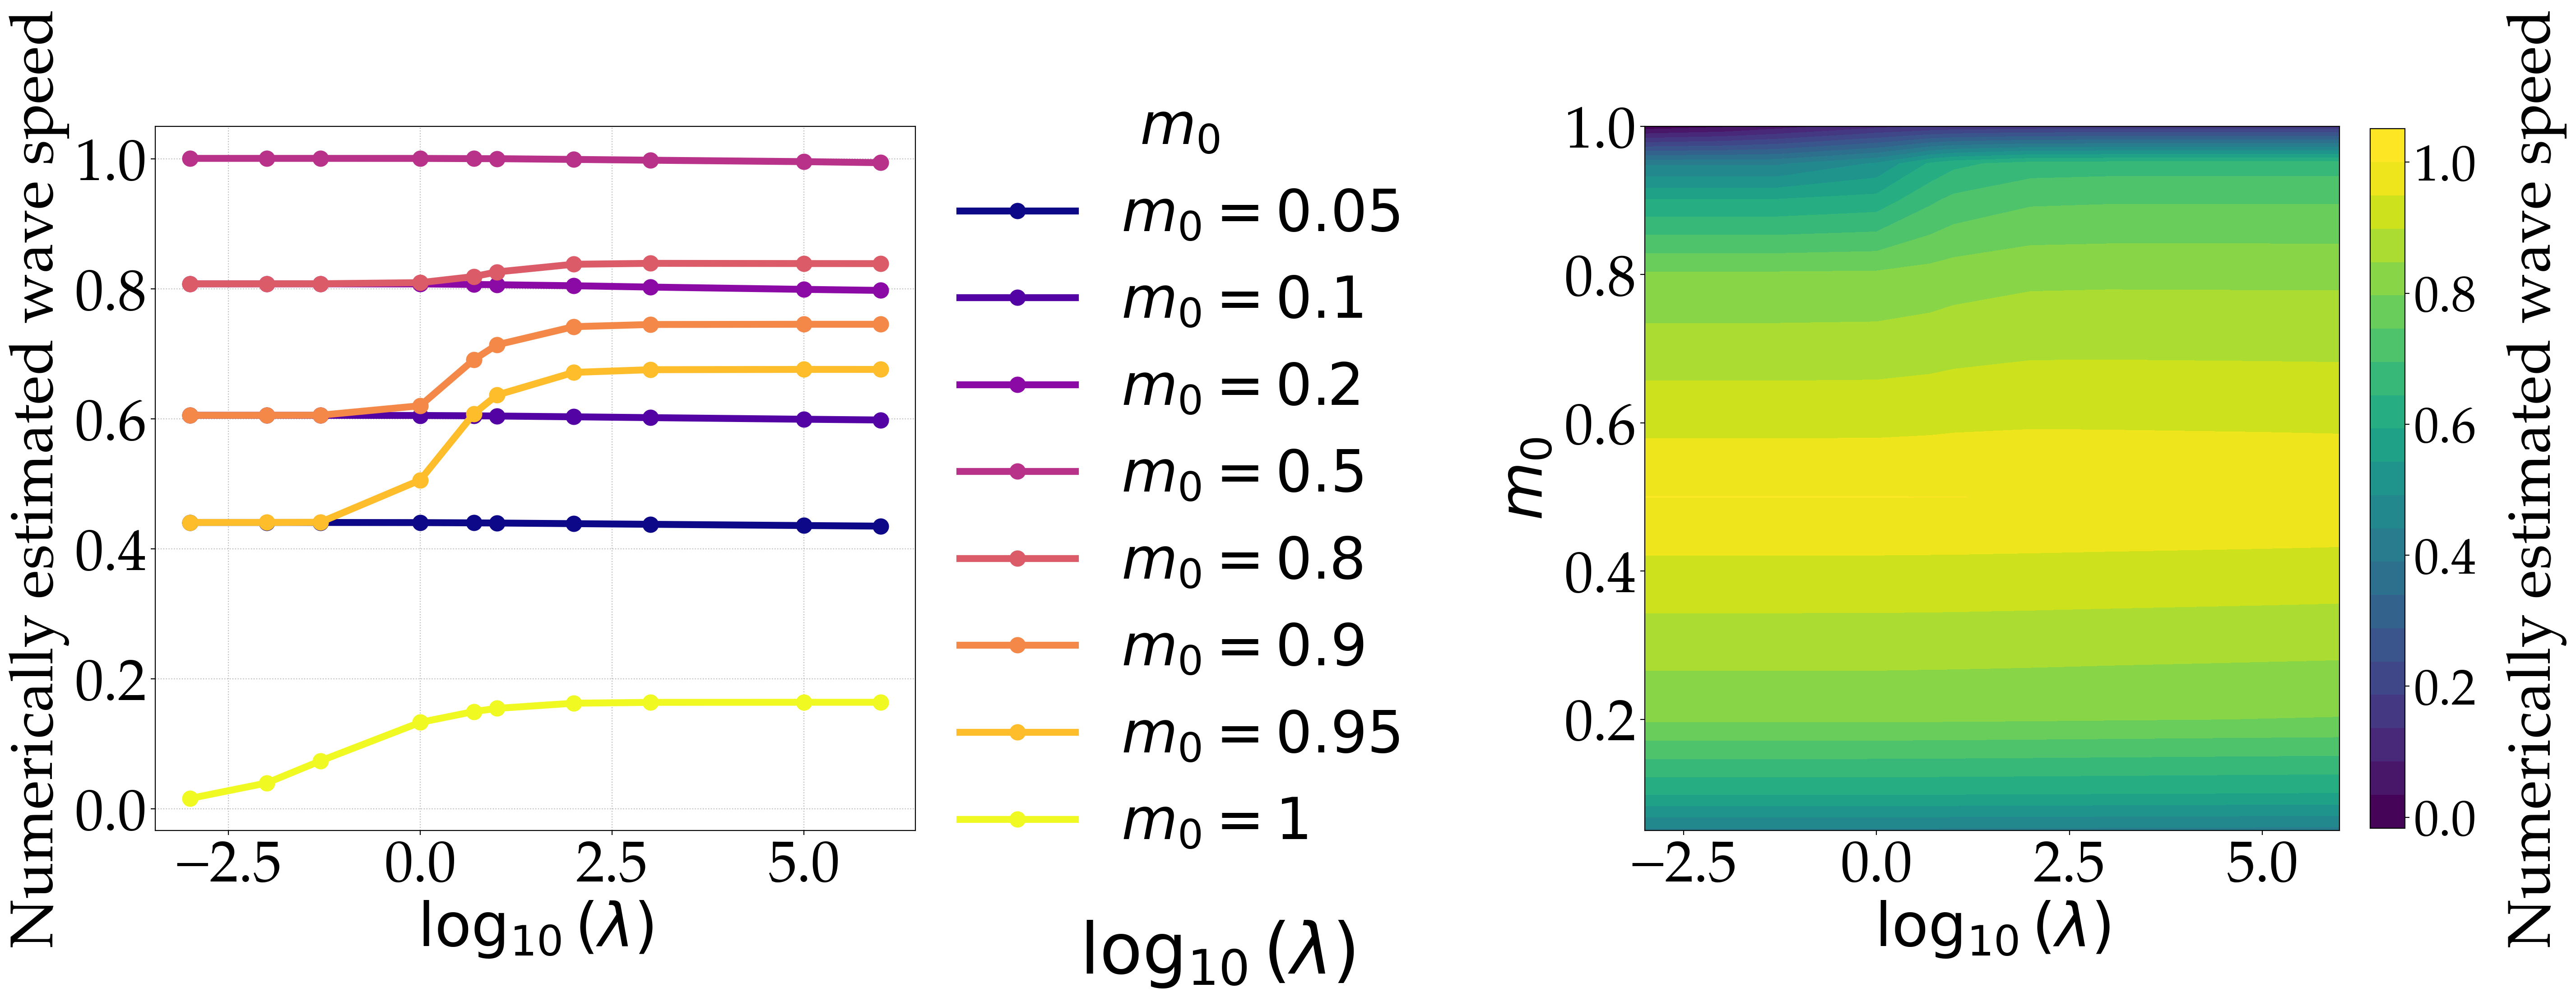

In [48]:
# plots_from_runs_plain_combo_styled_bigfonts.py
import os, re, json, shutil
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    """Extract float from folder names like 'lambda_0.001' or 'm0_0.5'."""
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    """Find run dir: base_dir/lambda_*/m0_*/summary.json"""
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None:
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None:
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None:
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Global Styling -------------
# ======================================
def _apply_thesis_style():
    """Match thesis fonts (tgpagella + mathpazo) with fallback if LaTeX missing."""
    if shutil.which("latex"):
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "serif",
            "text.latex.preamble": r"\usepackage{tgpagella}\usepackage{mathpazo}",
        })
    else:
        # Fallback to TeX Gyre Pagella / Palatino-like
        plt.rcParams.update({
            "text.usetex": False,
            "font.family": "serif",
            "font.serif": ["TeX Gyre Pagella", "Palatino Linotype", "Palatino",
                           "Book Antiqua", "serif"],
            "mathtext.fontset": "custom",
            "mathtext.rm": "TeX Gyre Pagella",
            "mathtext.it": "TeX Gyre Pagella:italic",
            "mathtext.bf": "TeX Gyre Pagella:bold",
        })

    # Big, legible defaults
    plt.rcParams.update({
        "figure.figsize": (28, 10),   # not too wide; comfortable width
        "figure.dpi": 200,
        "font.size": 34,              # base size (affects legends, etc.)
        "axes.labelsize": 48,
        "axes.titlesize": 52,
        "xtick.labelsize": 46,
        "ytick.labelsize": 46,
        "legend.fontsize": 46,
        "lines.linewidth": 5.5,
        "lines.markersize": 12,
    })

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=12, lw=5.5,
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    handles, labels = [], []
    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        h, = ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"$m_0={m0:g}$"
        )
        handles.append(h); labels.append(rf"$m_0={m0:g}$")

    # Labels, grid
    ax.set_xlabel(r"$\log_{10}(\lambda)$")
    ax.set_ylabel(r"Numerically estimated wave speed")
    ax.grid(True, linestyle=":", alpha=0.85)

    # Legend to the right of THIS axes (close in)
    ax.legend(
        handles, labels, title=r"$m_0$",
        loc="center left", bbox_to_anchor=(0.99, 0.5), frameon=False,
        title_fontsize=46
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0
    vmax_fixed = 1.0

    # Filled contours
    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap,
                     vmin=vmin_auto, vmax=vmax_fixed)

    ax.set_xlabel(r"$\log_{10}(\lambda)$")
    ax.set_ylabel(r"$m_0$")
    ax.grid(False)

    # Colorbar on this axes (large ticks/label)
    cbar = plt.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
    ticks = np.linspace(vmin_auto, vmax_fixed, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", rotation=90, labelpad=24)
    cbar.ax.tick_params(labelsize=40)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6),
):
    _apply_thesis_style()

    # Two panels with a small, professional gap
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(28, 10))
    fig.subplots_adjust(wspace=0.96)

    # Left: line plot (legend just outside the axes)
    _plot_speed_vs_log_lambda_on_ax(ax1, base_dir, m0_vals, lambda_vals)

    # Right: heatmap
    _plot_wavespeed_heatmap_on_ax(ax2, base_dir, lambda_vals, m0_vals)

    # Common x-label across both panels
    fig.supxlabel(r"$\log_{10}(\lambda)$", fontsize=56, y=-0.02)

    # Slight margins so nothing clips
    fig.subplots_adjust(left=0.08, right=0.97, top=0.94, bottom=0.16)

    fig.suptitle(" ", fontsize=1.0, y=1.07)
    plt.show()
    return fig, (ax1, ax2)


# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6],
    )

In [ ]:
m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6],
        figsize=(22, 8),   # overall figure size
        box_aspect=0.8 # try 0.55 for "a bit more vertical

findfont: Font family ['TeX Gyre Pagella'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Pagella'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Pagella'] not found. Falling back to DejaVu Sans.


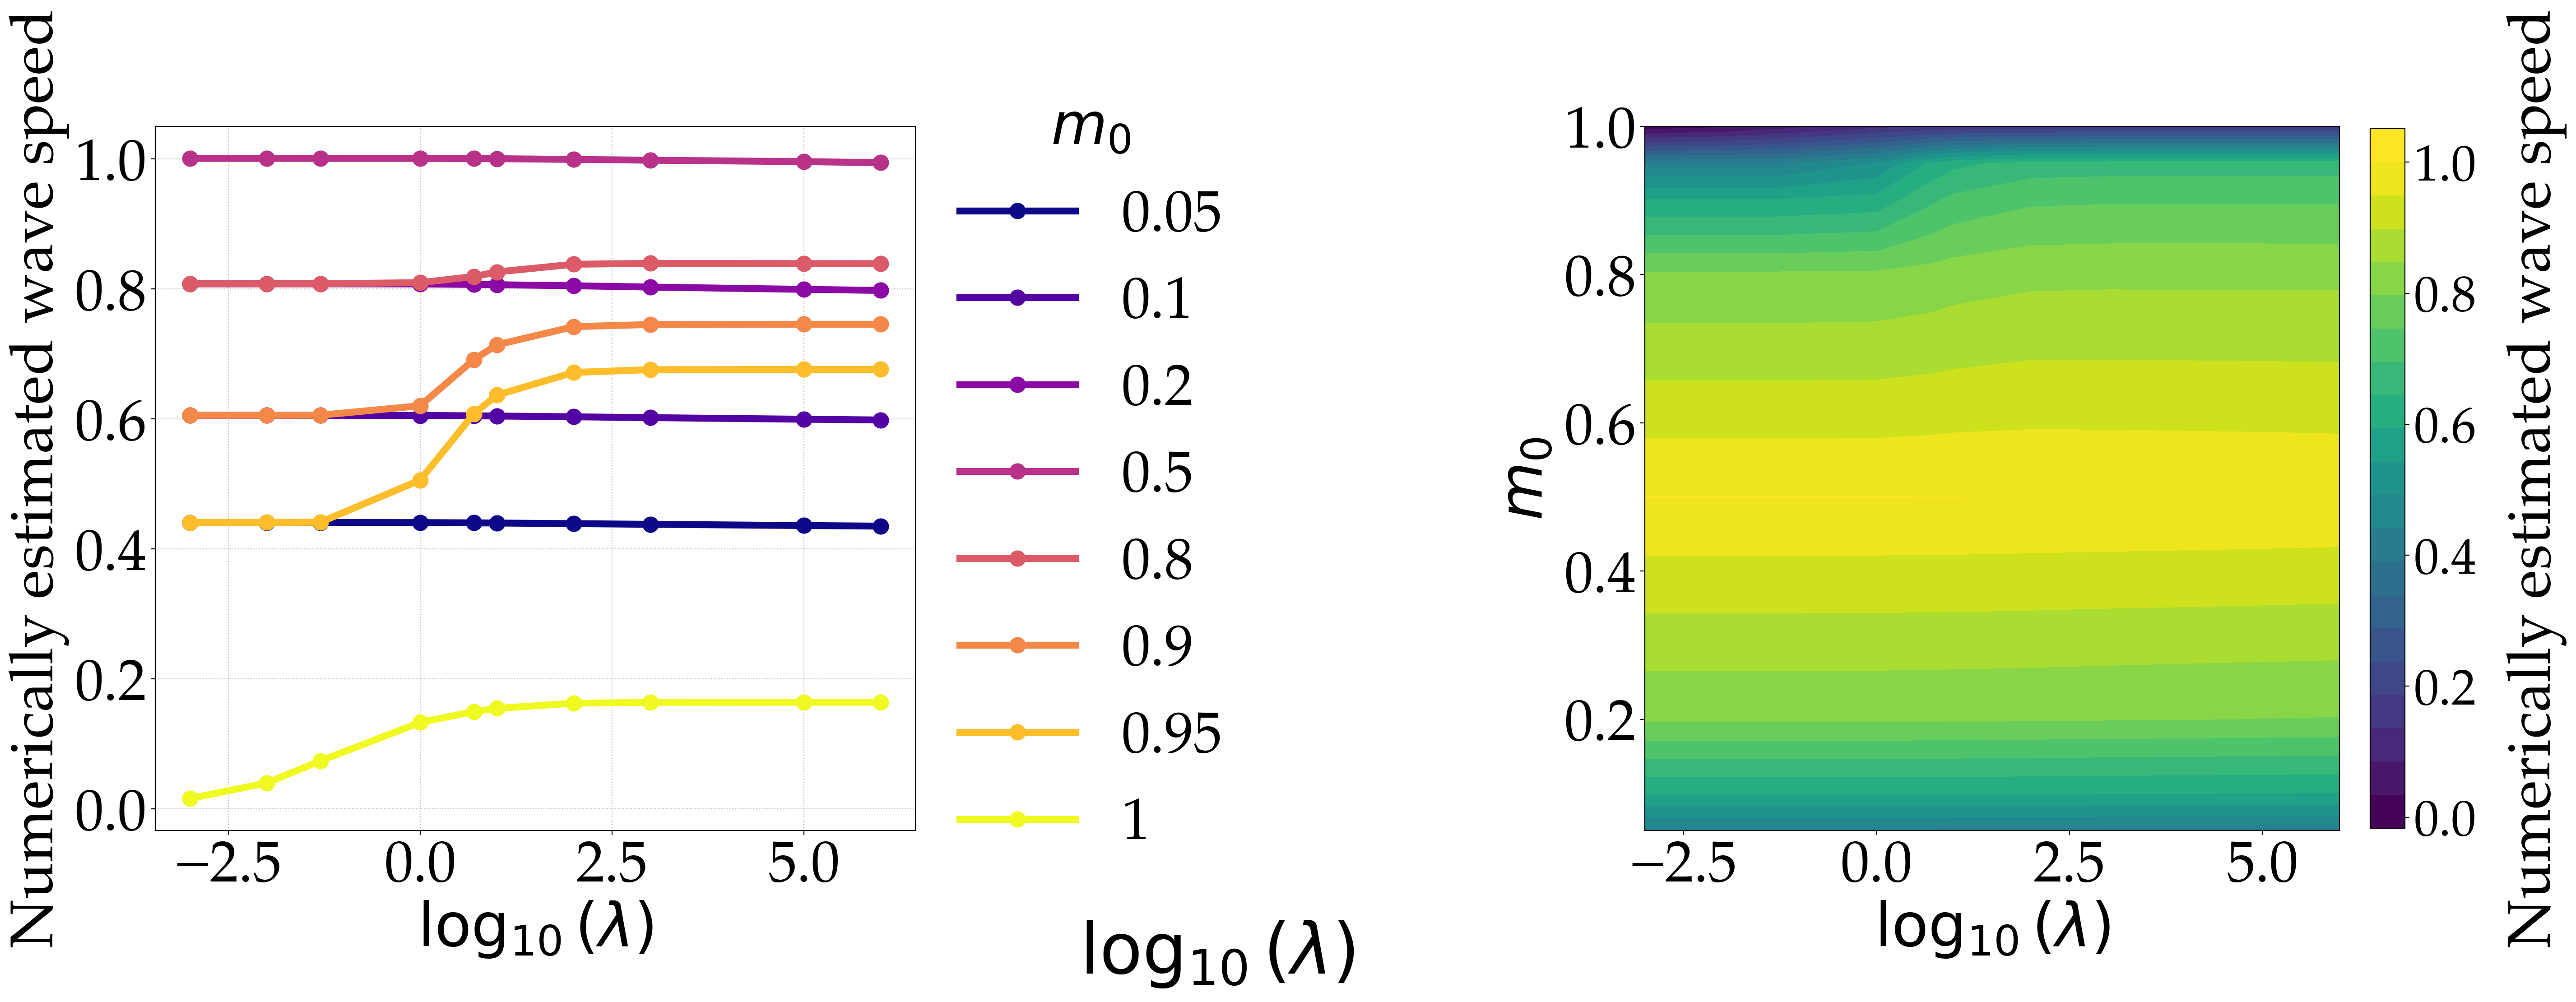

In [1]:
# plots_from_runs_plain_combo_styled_bigfonts.py
import os, re, json, shutil
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# --------- Shared Helper Utils --------
# ======================================
def _approx_eq(a, b, tol=1e-12):
    try:
        return abs(float(a) - float(b)) < tol * max(1.0, abs(float(a)), abs(float(b)))
    except Exception:
        return False

def _scan_float_from_suffix(name: str, prefix: str):
    """Extract float from folder names like 'lambda_0.001' or 'm0_0.5'."""
    if not name.startswith(prefix):
        return None
    try:
        return float(name[len(prefix):])
    except Exception:
        return None

def _find_run_dir_plain(base_dir: Path, lam: float, m0: float):
    """Find run dir: base_dir/lambda_*/m0_*/summary.json"""
    base_dir = Path(base_dir)
    if not base_dir.exists():
        return None
    lam_dir = None
    for cand in base_dir.glob("lambda_*"):
        lam_val = _scan_float_from_suffix(cand.name, "lambda_")
        if lam_val is None:
            continue
        if _approx_eq(lam_val, lam):
            lam_dir = cand
            break
    if lam_dir is None:
        return None
    for cand in lam_dir.glob("m0_*"):
        m_val = _scan_float_from_suffix(cand.name, "m0_")
        if m_val is None:
            continue
        if _approx_eq(m_val, m0):
            return cand
    return None

def _load_summary(run_dir: Path):
    if run_dir is None:
        return {}
    s = run_dir / "summary.json"
    if s.exists():
        with open(s, "r") as f:
            return json.load(f)
    return {}

# ======================================
# --------- Global Styling -------------
# ======================================
def _apply_thesis_style():
    """Match thesis fonts (tgpagella + mathpazo) with fallback if LaTeX missing."""
    if shutil.which("latex"):
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "serif",
            "text.latex.preamble": r"\usepackage{tgpagella}\usepackage{mathpazo}",
        })
    else:
        # Fallback to TeX Gyre Pagella / Palatino-like
        plt.rcParams.update({
            "text.usetex": False,
            "font.family": "serif",
            "font.serif": ["TeX Gyre Pagella", "Palatino Linotype", "Palatino",
                           "Book Antiqua", "serif"],
            "mathtext.fontset": "custom",
            "mathtext.rm": "TeX Gyre Pagella",
            "mathtext.it": "TeX Gyre Pagella:italic",
            "mathtext.bf": "TeX Gyre Pagella:bold",
        })

    # Big, legible defaults
    plt.rcParams.update({
        "figure.figsize": (28, 10),   # not too wide; comfortable width
        "figure.dpi": 200,
        "font.size": 34,              # base size (affects legends, etc.)
        "axes.labelsize": 48,
        "axes.titlesize": 52,
        "xtick.labelsize": 46,
        "ytick.labelsize": 46,
        "legend.fontsize": 46,
        "lines.linewidth": 5.5,
        "lines.markersize": 12,
    })

# ======================================
# --------- Line Plot Function ---------
# ======================================
def _plot_speed_vs_log_lambda_on_ax(
    ax, base_dir, m0_vals, lambda_vals,
    cmap_name="plasma", ms=12, lw=5.5,
):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / max(1, len(m0_vals)-1)) for i in range(len(m0_vals))]
    log_lambda = np.log10(np.asarray(lambda_vals, dtype=float))

    handles, labels = [], []
    for k, m0 in enumerate(m0_vals):
        speeds = []
        for lam in lambda_vals:
            run_dir = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(run_dir)
            cN = meta.get("wave_speed", np.nan)
            speeds.append(float(cN) if (cN is not None and np.isfinite(cN)) else np.nan)
        speeds = np.asarray(speeds, dtype=float)
        h, = ax.plot(
            log_lambda, speeds,
            "-o", color=colors[k], lw=lw, ms=ms, label=rf"{m0:g}"  # <-- no 'm_0=' here
        )
        handles.append(h); labels.append(rf"{m0:g}")

    # Labels, grid
    ax.set_xlabel(r"$\log_{10}(\lambda)$")
    ax.set_ylabel(r"Numerically estimated wave speed")
    ax.grid(True, linestyle=":", alpha=0.85)

    # Legend to the right of THIS axes (close in)
    ax.legend(
        handles, labels, title=r"$m_0$",
        loc="center left", bbox_to_anchor=(0.99, 0.5), frameon=False,
        title_fontsize=46
    )

# ======================================
# --------- Heatmap Function -----------
# ======================================
def _plot_wavespeed_heatmap_on_ax(
    ax, base_dir, lambda_vals, m0_vals,
    cmap="viridis", levels=20,
):
    m0_vals = np.asarray(m0_vals, dtype=float)
    lambda_vals = np.asarray(lambda_vals, dtype=float)

    H = np.full((len(m0_vals), len(lambda_vals)), np.nan, dtype=float)
    for i, m0 in enumerate(m0_vals):
        for j, lam in enumerate(lambda_vals):
            rd = _find_run_dir_plain(base_dir, lam, m0)
            meta = _load_summary(rd)
            cN = meta.get("wave_speed", np.nan)
            H[i, j] = float(cN) if (cN is not None and np.isfinite(cN)) else np.nan

    X, Y = np.meshgrid(np.log10(lambda_vals), m0_vals)
    vmin_auto = float(np.nanmin(H)) if np.isfinite(H).any() else 0.0
    vmax_fixed = 1.0

    # Filled contours
    cf = ax.contourf(X, Y, H, levels=levels, cmap=cmap,
                     vmin=vmin_auto, vmax=vmax_fixed)

    ax.set_xlabel(r"$\log_{10}(\lambda)$")
    ax.set_ylabel(r"$m_0$")
    ax.grid(False)

    # Colorbar on this axes (large ticks/label)
    cbar = plt.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
    ticks = np.linspace(vmin_auto, vmax_fixed, 6)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{t:.1f}" for t in ticks])
    cbar.set_label("Numerically estimated wave speed", rotation=90, labelpad=24)
    cbar.ax.tick_params(labelsize=40)

# ======================================
# --------- Combined Plot Call ---------
# ======================================
def plot_combo_line_and_heatmap(
    base_dir="speeds_plain_L200N20001",
    m0_vals=(0.05, 0.1, 0.2, 0.5, 0.9, 0.99),
    lambda_vals=(0.001, 0.01, 0.05, 0.1, 1, 5, 10, 100, 1000, 1e5, 1e6),
):
    _apply_thesis_style()

    # Two panels with a small, professional gap
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(28, 10))
    fig.subplots_adjust(wspace=0.96)   # <-- unchanged

    # Left: line plot (legend just outside the axes)
    _plot_speed_vs_log_lambda_on_ax(ax1, base_dir, m0_vals, lambda_vals)

    # Right: heatmap
    _plot_wavespeed_heatmap_on_ax(ax2, base_dir, lambda_vals, m0_vals)

    # Common x-label across both panels
    fig.supxlabel(r"$\log_{10}(\lambda)$", fontsize=56, y=-0.02)

    # Slight margins so nothing clips
    fig.subplots_adjust(left=0.08, right=0.97, top=0.94, bottom=0.16)

    fig.suptitle(" ", fontsize=1.0, y=1.07)
    plt.show()
    return fig, (ax1, ax2)


# ======================================
# Example run
# ======================================
if __name__ == "__main__":
    plot_combo_line_and_heatmap(
        base_dir="speeds_plain_L200N20001",
        m0_vals=[0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0],
        lambda_vals=[0.001, 0.01, 0.05, 1, 5, 10, 100, 1000, 1e5, 1e6],
    )